# Speed dating challenge

Quels sont les attributs les moins désirables chez un partenaire masculin ? Est-ce différent pour un partenaire féminin ?


Quelle importance les gens accordent-ils à l'attractivité dans le choix d'un potentiel partenaire par rapport à son impact réel ?


Les intérêts communs sont-ils plus importants qu'un milieu racial commun ?


Les gens peuvent-ils prédire avec précision leur propre valeur perçue sur le marché des rencontres ?


Pour obtenir un deuxième rendez-vous, vaut-il mieux être le premier rendez-vous rapide de la soirée pour quelqu'un ou le dernier ?

## Import et encodage des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Set pandas display option 
pd.options.display.max_rows = 1000


def load_data(file_name):
    """
    Load data from CSV, handle encoding
    """
    return pd.read_csv(file_name, encoding='ISO-8859-1')


def clean_data(df):
    """
    Data preprocesssing / cleaning
    """
    # Remove commas in income and convert to float
    df['income'] = df['income'].str.replace(',', '').astype(float)

    # Fill NaNs
    df.fillna({
        'age': round(df['age'].mean()),
        'income': round(df['income'].median()),
        'career': 'Unspecified',
        'attr': round(df['attr'].mean()),
        'sinc': round(df['sinc'].mean()),
        'intel': round(df['intel'].mean()),
        'fun': round(df['fun'].mean()),
        'amb': round(df['amb'].mean()),
        'shar': round(df['shar'].mean()),
        'like': round(df['like'].mean()),
        'prob': round(df['prob'].mean()),
    }, inplace=True)


df = load_data('Speed+Dating+Data.csv')
clean_data(df)

In [2]:
'''
Ce code calcule l'âge moyen des participants dans le DataFrame df. La méthode mean() calcule la moyenne de la colonne 'age' et la méthode round() arrondit cette moyenne à l'entier le plus proche. Par exemple, si l'âge moyen est 25.6, le résultat affiché sera 26.
'''
df['age'].mean().round()

26.0

([<matplotlib.axis.XTick at 0x15d2db4d0>,
 [Text(0, 0, 'Femme'), Text(1, 0, 'Homme')])

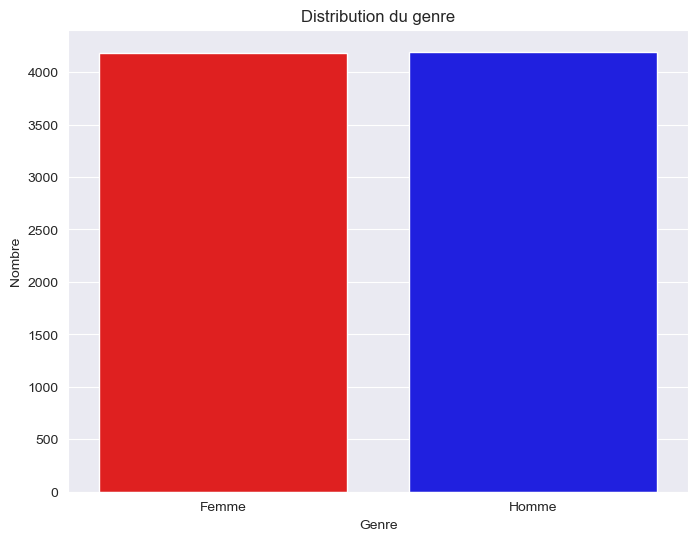

In [3]:
'''
Ce code montre la distribution du genre dans les données. Il utilise la fonction countplot() de Seaborn pour afficher un histogramme de barres représentant le nombre de femmes et d'hommes (supposant que 0 correspond à "Femme" et 1 à "Homme").

Voici une analyse détaillée du code :

- plt.figure(figsize=(8, 6)) : Crée une nouvelle figure avec une taille spécifique.
- sns.countplot(x='gender', data=df) : Dessine un histogramme à partir des valeurs de la colonne 'gender' du DataFrame df.
- plt.title('Distribution du genre') : Définit le titre du graphique.
- plt.xlabel('Genre') : Définit le label de l'axe des x.
- plt.ylabel('Nombre') : Définit le label de l'axe des y.
- plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme']) : Remplace les valeurs 0 et 1 sur l'axe des x par 'Femme' et 'Homme' respectivement.
'''

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette=['red', 'blue'])
plt.title('Distribution du genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme'])

On peut observer ici que les genre sont répartis uniformément dans notre jeu de données

In [4]:
'''
Ce segment de code examine la corrélation de Spearman entre toutes les paires de colonnes numériques du DataFrame df.

Pour cela, il suit ces étapes :

- Utilise la méthode select_dtypes(include=[np.number]) pour sélectionner uniquement les colonnes avec des données numériques.
- Calcule la corrélation de Spearman entre toutes les colonnes numériques avec la méthode corr(method='spearman'). La corrélation de Spearman est une mesure de la relation monotone entre deux variables, avec 1 signifiant une corrélation parfaite positive, et -1 signifiant une corrélation parfaite négative.
- Style le DataFrame de corrélation avec deux décimales utilisant format("{:.2}").
- Applique un gradient de couleurs du bleu (corrélation négative) au rouge (corrélation positive) pour faciliter la visualisation des corrélations. Cela est fait avec background_gradient(cmap=plt.get_cmap('coolwarm')). 
'''

# Code
df.select_dtypes(include=[np.number]).corr(method='spearman').style.format("{:.2}").background_gradient(
    cmap=plt.get_cmap('coolwarm'))

In [5]:
'''
Ce segment de code génère une tabulation croisée (ou "cross-tab") de la colonne 'match' du DataFrame df. Une tabulation croisée est une table qui présente la fréquence de distribution des différentes catégories de données.

Détail du code :

- pd.crosstab(index=df['match'], columns='counts') : Utilise la fonction crosstab de pandas pour créer une tabulation croisée des données. L'argument index spécifie les valeurs à utiliser pour l'index de la table (les lignes), qui dans ce cas sont les valeurs de la colonne 'match' du DataFrame df. L'argument columns est utilisé pour spécifier les colonnes de la table. Dans ce cas, puisque nous n'avons pas d'autres colonnes et que nous ne faisons qu'un comptage simple, nous utilisons le mot 'counts'.

- Le résultat de cette opération est une table montrant le nombre de fois que chaque valeur unique de 'match' apparaît dans le DataFrame df.

'''

# Code
pd.crosstab(index=df['match'], columns='counts')

col_0  counts
match        
0        6998
1        1380

Text(0.5, 0.5, 'Mean Decision: 0.42')

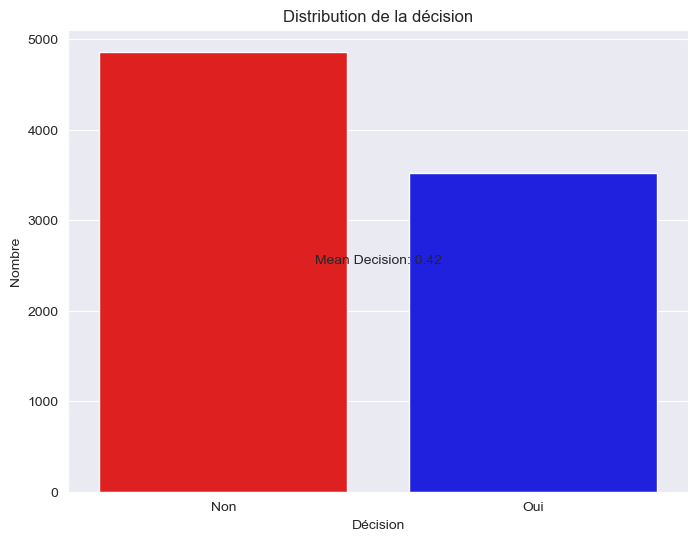

In [6]:
'''
Ce code génère un graphique en barres illustrant le nombre de matches et de non-matches dans les données. Chaque barre représente un type de décision (match ou non-match) et sa hauteur indique le nombre de fois que cette décision a été prise.

Explication du code :

- plt.figure(figsize=(8, 6)) : Crée une nouvelle figure avec une taille spécifiée (8 unités de large et 6 unités de hauteur).
- sns.countplot(x='dec', data=df) : Utilise la fonction countplot de Seaborn pour créer un graphique en barres. Les données pour ce graphique proviennent de la colonne 'dec' de DataFrame df.
- plt.title('Distribution de la décision (1 = Match, 0 = Pas de Match)') : Donne un titre au graphique.
- plt.xlabel('Décision') et plt.ylabel('Nombre') : Définit les labels pour les axes x et y du graphique.
- plt.xticks(ticks=[0, 1], labels=['Non', 'Oui']) : Remplace les valeurs des xticks (0 et 1) par 'Non' et 'Oui', respectivement.

En fonction des données, vous devriez voir deux barres dans le graphique généré, une pour 'Non' (non-match) et une pour 'Oui' (match), chaque barre représentant le nombre de fois que chaque décision a été prise.

'''

# Code
plt.figure(figsize=(8, 6))
sns.countplot(x='dec', data=df,palette=['red', 'blue'])
plt.title('Distribution de la décision')
plt.xlabel('Décision')
plt.ylabel('Nombre')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])

mean_dec = df['dec'].mean()
plt.text(0.5, 0.5, f'Mean Decision: {mean_dec:.2f}', horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes)

On peut voir ici qu'il y a une majorité de Non pour une minorité de oui (environ 42%)

Text(0, 0.5, 'Revenu')

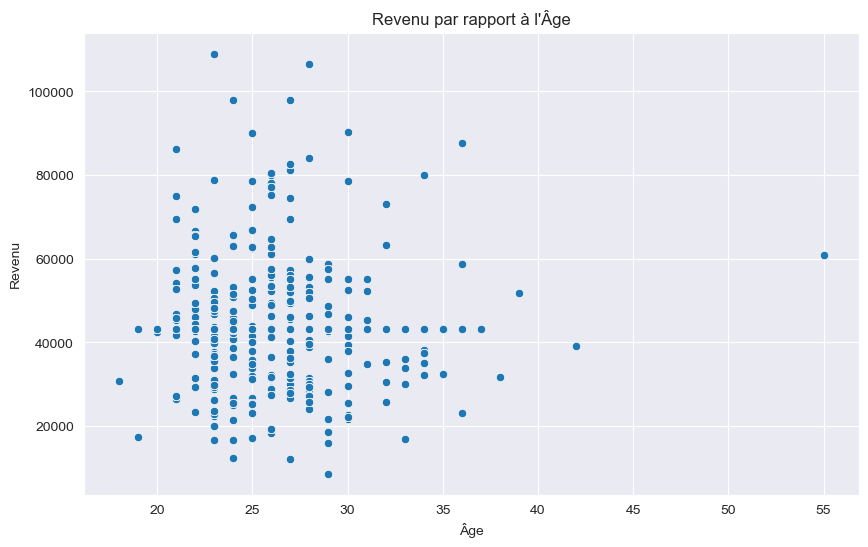

In [7]:
'''
Ce code trace un diagramme de dispersion comparant l'âge et le revenu à partir des données du DataFrame df. Les diagrammes de dispersion sont utilisés pour déterminer la relation entre deux variables.

Détails du code :

- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifiée (10 unités de large et 6 de haut).
- sns.scatterplot(x='age', y='income', data=df) : Utilise la fonction scatterplot de Seaborn pour tracer un diagramme de dispersion. L'axe des x représente "l'âge" et l'axe des y "le revenu". Les données sont extraites du DataFrame df.
- plt.title('Revenu par rapport à l\'Âge') : Donne un titre au diagramme de dispersion.
- plt.xlabel('Âge') et plt.ylabel('Revenu') : Donne des noms aux axes x et y du diagramme de dispersion.

Le diagramme de dispersion résultant montrera chaque individu comme un point dont l'ordonnée est le revenu et l'abscisse est l'âge.

'''

# Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Revenu par rapport à l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Revenu')

On peut observer un outlayer ici, mais cela ne risque pas de biaiser nos données. Observons quand même l'occurence des ages par acquis de conscience.

In [8]:
age_counts = df['age'].value_counts()
print(age_counts)

age
27.0    1059
26.0     964
23.0     894
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: count, dtype: int64


Ok, 6. Retirons-les du dataset.

In [9]:
"""
Ce fragment de code supprime toutes les lignes du DataFrame 'df' où la valeur de la colonne 'age' est égale à 55.

Voici le processus détaillé:

1. Identification des lignes où la colonne 'age' est égale à 55 en utilisant 'df['age'] == 55'. Les indices de ces lignes sont stockés dans la variable 'index_55'.
   
2. Suppression de ces lignes du DataFrame 'df' en utilisant la méthode 'drop' avec 'index_55' comme argument. L'argument 'inplace=True' modifie directement le DataFrame 'df' sans créer un nouveau DataFrame.
   
3. Confirmation de l'opération en affichant le décompte des valeurs pour la colonne 'age' à l'aide de la méthode 'value_counts'. 

Arguments :
    df (DataFrame) : Un DataFrame qui contient une colonne nommée 'age'.

Modifie :
    df (DataFrame) : Le même DataFrame mais avec les lignes où 'age' est égal à 55 supprimées.
"""

index_55 = df[df['age'] == 55].index

df.drop(index_55, inplace=True)

print(df['age'].value_counts())

age
27.0    1059
26.0     964
23.0     894
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
37.0       5
Name: count, dtype: int64


Text(0, 0.5, 'Revenu')

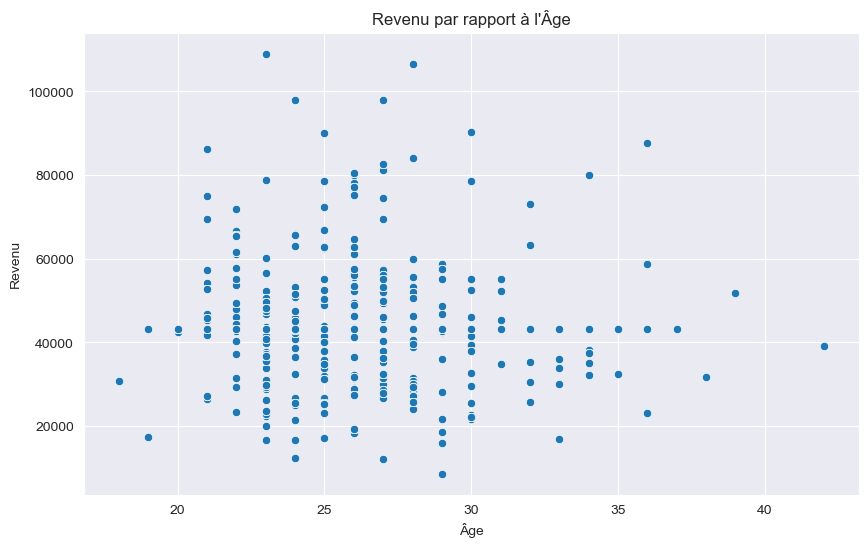

In [10]:
'''
Ce code trace un diagramme de dispersion comparant l'âge et le revenu à partir des données du DataFrame df. Les diagrammes de dispersion sont utilisés pour déterminer la relation entre deux variables.

Détails du code :

- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifiée (10 unités de large et 6 de haut).
- sns.scatterplot(x='age', y='income', data=df) : Utilise la fonction scatterplot de Seaborn pour tracer un diagramme de dispersion. L'axe des x représente "l'âge" et l'axe des y "le revenu". Les données sont extraites du DataFrame df.
- plt.title('Revenu par rapport à l\'Âge') : Donne un titre au diagramme de dispersion.
- plt.xlabel('Âge') et plt.ylabel('Revenu') : Donne des noms aux axes x et y du diagramme de dispersion.

Le diagramme de dispersion résultant montrera chaque individu comme un point dont l'ordonnée est le revenu et l'abscisse est l'âge.

'''

# Code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Revenu par rapport à l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Revenu')

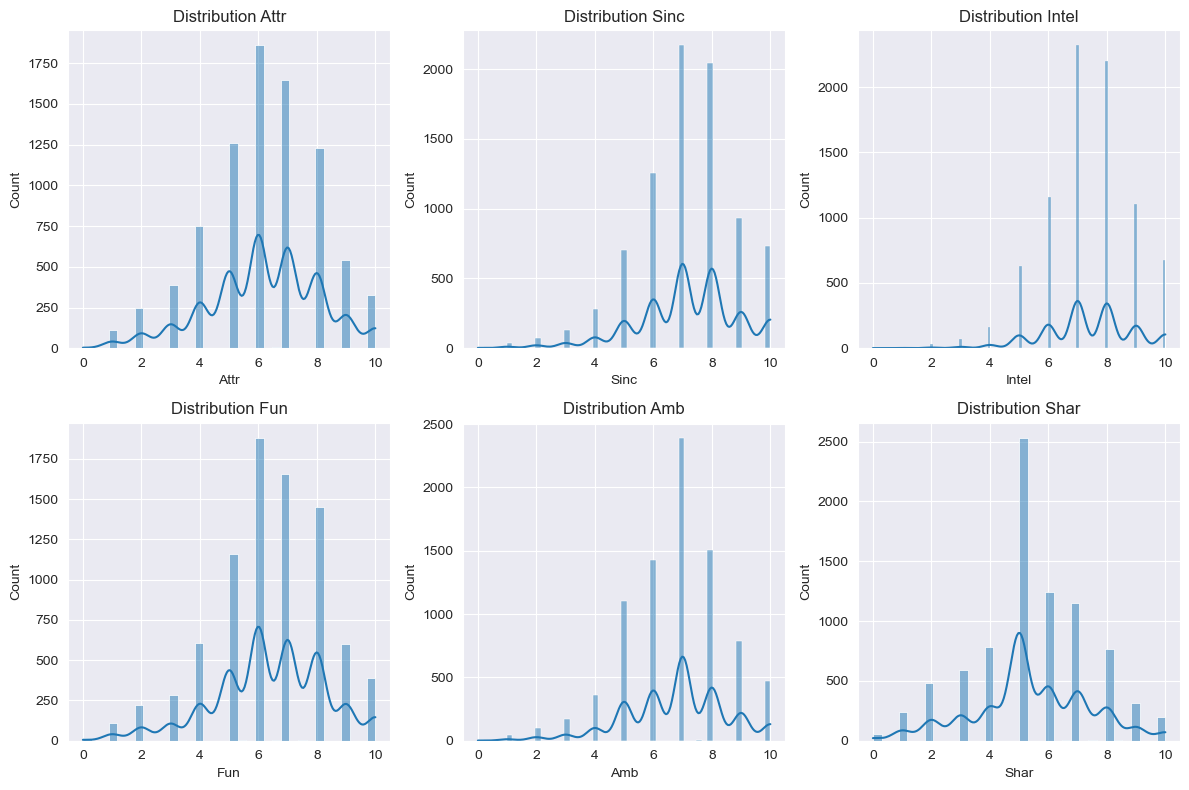

In [11]:
'''
Ce code génère des histogrammes pour chacun des scores ('attr', 'sinc', 'intel', 'fun', 'amb', 'shar') dans le DataFrame df. Il affiche chaque histogramme dans son propre sous-graphique.

Détails du code :

- score_cols = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'] : Crée une liste des noms de colonnes des différents scores.
- plt.figure(figsize=(12, 8)) : Crée une nouvelle figure de taille (12, 8).
- for i, col in enumerate(score_cols, 1) : Parcourt les colonnes de score une par une. Enumerate retourne à chaque itération un tuple contenant un compte (à partir de 1 dans ce cas) et la valeur du tuple à partir du score_cols.
- plt.subplot(2, 3, i) : Ajoute un sous-graphique à la figure actuelle.
- sns.histplot(df[col].dropna(), kde=True) : Trace l'histogramme de la colonne de score en question. Les valeurs NaN sont exclues avec .dropna().
- plt.title('Distribution ' + col.capitalize()) : Définit le titre du sous-graphique.
- plt.xlabel(col.capitalize()) et plt.ylabel('Count') : Définit les labels pour les axes x et y du sous-graphique.
- plt.tight_layout() : Ajuste automatiquement le padding entre les sous-figures.

Une fois le code exécuté, vous obtiendrez une figure avec six sous-graphiques, chacun montrant l'histogramme d'un score différent.

'''

# Code
score_cols = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

plt.figure(figsize=(12, 8))

for i, col in enumerate(score_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title('Distribution ' + col.capitalize())
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()

On peut noter qu'ici nos distributions semblent normales

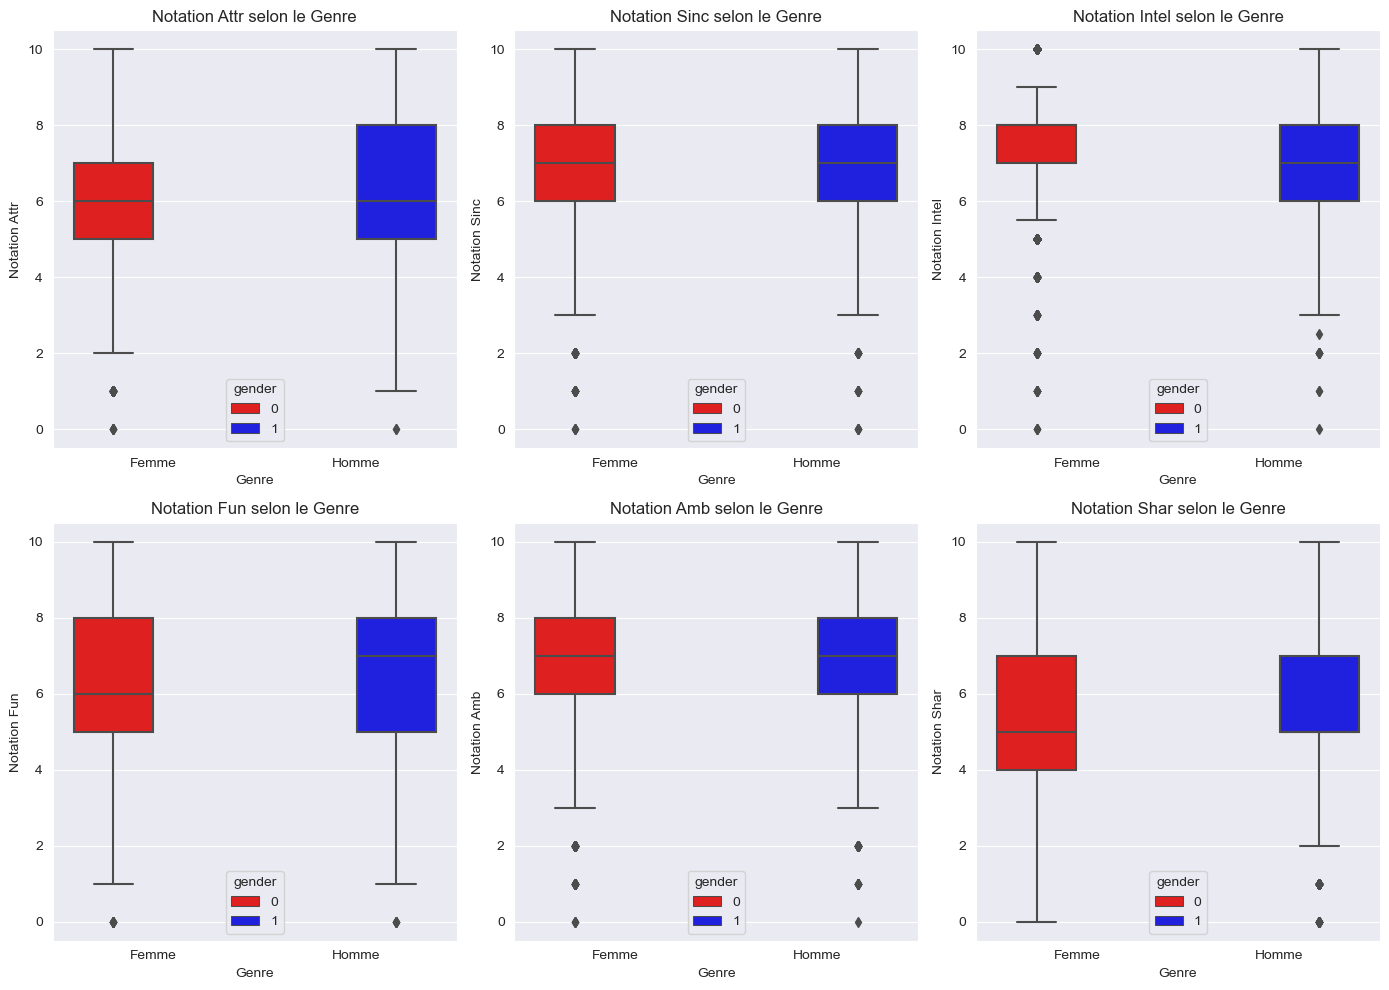

In [12]:
'''
Ce segment de code génère une figure contenant six boîtes à moustaches, chacune illustrant la distribution des évaluations pour une caractéristique spécifique ('attr', 'sinc', 'intel', 'fun', 'amb', 'shar') par genre. Chaque boîte à moustaches est dessinée sur son propre sous-graphique.

Explication du code :

- plt.figure(figsize=(14, 10)) : Crée une nouvelle figure avec une taille définie (14 unités de large et 10 unités de haut).
- for i, notation in enumerate(notations, 1) : Parcourt la liste des notations définies au début du script. À chaque itération, 'i' est un index commençant à 1 et 'notation' est une chaîne contenant le nom d'une notation.
- plt.subplot(2, 3, i) : Ajoute un sous-graphique à la figure actuelle. Les sous-graphiques sont organisés dans une grille 2x3 et le sous-graphique à afficher est spécifié par 'i'.
- sns.boxplot(x='gender', y=notation, data=df) : Dessine une boîte à moustaches représentant la distribution de la notation spécifiée en fonction du genre.
- plt.title(f'Notation {notation.capitalize()} selon le Genre') : Ajoute un titre au sous-graphique.
- plt.xlabel('Genre') et plt.ylabel(f'Notation {notation.capitalize()}') : Définit les libellés des axes x et y du sous-graphique.
- plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme']) : Remplace les valeurs xtick par défaut (0 et 1) par 'Femme' et 'Homme'.
- plt.tight_layout() : Ajuste automatiquement les paramètres de la disposition pour qu'il n'y ait pas de chevauchement entre les sous-graphiques.

'''

notations = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

plt.figure(figsize=(14, 10))
for i, notation in enumerate(notations, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='gender', y=notation, data=df, hue='gender', palette=['red', 'blue'])
    plt.title(f'Notation {notation.capitalize()} selon le Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'Notation {notation.capitalize()}')
    plt.xticks(ticks=[0, 1], labels=['Femme', 'Homme'])

plt.tight_layout()

## Distribution de l'âge en fonction de la décision

Text(0, 0.5, 'Age')

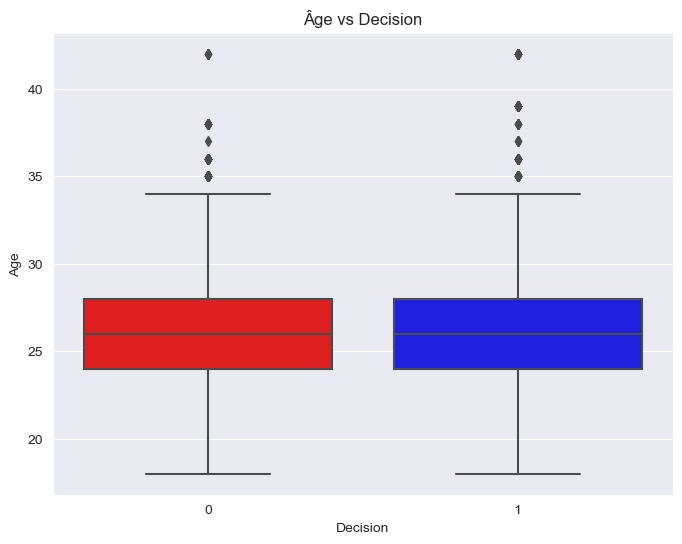

In [13]:
'''
Ce code génère un diagramme à moustaches montrant la distribution de l'âge en fonction de la décision de correspondance dans le DataFrame df.

Explication du code :

- plt.figure(figsize=(8, 6)) : Crée une nouvelle figure avec une taille spécifiée (8 unités de large et 6 unités de hauteur).
- sns.boxplot(x='dec', y='age', data=df) : Utilise la fonction boxplot de Seaborn pour créer un diagramme à moustaches. L'axe x représente la décision de correspondance ("dec") et l'axe y représente l'âge. Les données sont extraites de DataFrame df.
- plt.title('Âge vs Decision') : Attribue un titre au diagramme à moustaches.
- plt.xlabel('Decision') et plt.ylabel('Age') : Définit les labels pour les axes x et y du diagramme à moustaches.

Un diagramme à moustaches est une méthode graphique de représentation de groupes de valeurs numériques à travers leurs quartiles. En fonction des données, le diagramme pourrait montrer si l'âge a un impact sur la décision de correspondance ou non.

'''

# Code
plt.figure(figsize=(8, 6))
sns.boxplot(x='dec', y='age', data=df, palette=['red', 'blue'])
plt.title('Âge vs Decision')
plt.xlabel('Decision')
plt.ylabel('Age')

### C'est assez similaire !

## Distribution de la variable 'goal'

Text(0, 0.5, 'Count')

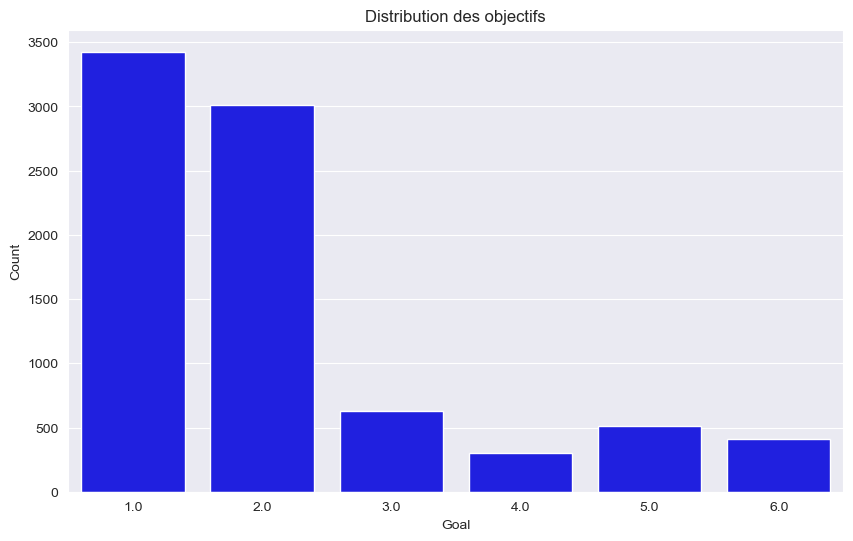

In [14]:
'''
Ce code génère un graphique à barres (ou un graphique de comptage) qui illustre la distribution de la variable 'goal' dans le DataFrame df.

Détails du code :

- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifiée (10 unités de largeur et 6 unités de hauteur).
- sns.countplot(x='goal', data=df, color='blue') : Utilise la fonction countplot de Seaborn pour créer un graphique de comptage. L'axe x représente la variable 'goal' et les données sont issues du DataFrame df. La couleur des barres est définie en bleu.
- plt.title('Distribution des objectifs') : Attribue un titre au graphique à barres.
- plt.xlabel('Goal') et plt.ylabel('Count') : Définit les labels pour les axes x et y du graphique à barres.

Une fois le code exécuté, le graphique à barres montrera combien de fois chaque valeur unique de 'goal' apparaît dans le DataFrame. C'est une façon efficace de visualiser la distribution d'une variable catégorielle.

'''

# Code
plt.figure(figsize=(10, 6))
sns.countplot(x='goal', data=df, color='blue')
plt.title('Distribution des objectifs')
plt.xlabel('Goal')
plt.ylabel('Count')

## Observation de la répartition des postes

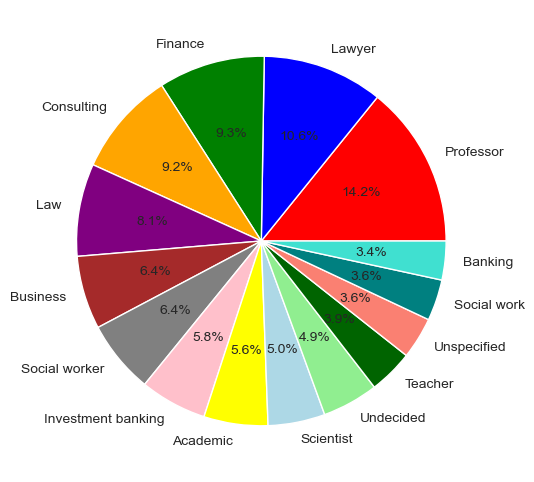

In [15]:
'''
Ce script met à jour la colonne 'career' du DataFrame df afin que la première lettre de chaque entrée soit une majuscule. Il crée ensuite un graphique en camembert affichant la distribution des 15 carrières les plus courantes.

Explication du code :

- df['career'] = df['career'].str.capitalize() : Modifie la colonne 'career' du DataFrame df en mettant la première lettre de chaque entrée en majuscule.
- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifiée, 10 unités de largeur et 6 unités de hauteur.
- plt.pie() : Utilise la fonction pie de pyplot pour créer un graphique en camembert. Les arguments de cette fonction déterminent les valeurs, les étiquettes et le format du texte des pourcentages sur le graphique.
- x=df["career"].value_counts().nlargest(15) : Sélectionne les 15 valeurs de 'career' les plus fréquentes dans le DataFrame pour représenter les parts du graphique en camembert.
- labels=df["career"].value_counts().nlargest(15).index : Définit les étiquettes du graphique en camembert pour correspondre aux 15 emplois les plus courants.
- autopct="%1.1f%%" : Détermine le format des pourcentages affichés sur le graphique en camembert, montrant un chiffre après la virgule.

Le graphique en camembert résultant montre la répartition des 15 carrières les plus courantes dans le DataFrame df.

'''

# Une liste d'exemple de couleurs
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink', 'yellow', 'lightblue', 'lightgreen',
          'darkgreen', 'salmon', 'teal', 'turquoise']

df['career'] = df['career'].str.capitalize()
plt.figure(figsize=(10, 6))
pie_chart = plt.pie(
    x=df["career"].value_counts().nlargest(15),
    labels=df["career"].value_counts().nlargest(15).index,
    autopct="%1.1f%%",
    colors=colors  # Ajout du paramètre colors
)

## A completer

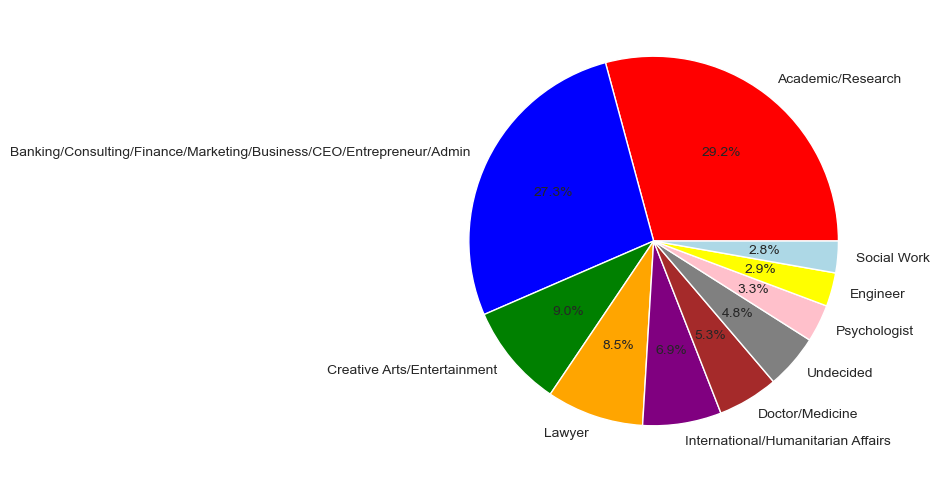

In [16]:
'''
Ce script met à jour la colonne 'career' du DataFrame df afin que la première lettre de chaque entrée soit une majuscule. Il crée ensuite un graphique en camembert affichant la distribution des 15 carrières les plus courantes.

Explication du code :

- df['career'] = df['career'].str.capitalize() : Modifie la colonne 'career' du DataFrame df en mettant la première lettre de chaque entrée en majuscule.
- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifiée, 10 unités de largeur et 6 unités de hauteur.
- plt.pie() : Utilise la fonction pie de pyplot pour créer un graphique en camembert. Les arguments de cette fonction déterminent les valeurs, les étiquettes et le format du texte des pourcentages sur le graphique.
- x=df["career"].value_counts().nlargest(15) : Sélectionne les 15 valeurs de 'career' les plus fréquentes dans le DataFrame pour représenter les parts du graphique en camembert.
- labels=df["career"].value_counts().nlargest(15).index : Définit les étiquettes du graphique en camembert pour correspondre aux 15 emplois les plus courants.
- autopct="%1.1f%%" : Détermine le format des pourcentages affichés sur le graphique en camembert, montrant un chiffre après la virgule.

Le graphique en camembert résultant montre la répartition des 15 carrières les plus courantes dans le DataFrame df.

'''

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink', 'yellow', 'lightblue', 'black',
          'darkgreen', 'salmon', 'teal', 'turquoise']


career_codes = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

# Obtenez les 10 codes de carrière les plus courants
top_career_codes = df["career_c"].value_counts().nlargest(10).index.astype(int)

# Utilisez le dictionnaire pour obtenir les noms de carrière correspondants
top_career_names = [career_codes[i] for i in top_career_codes]

plt.figure(figsize=(10, 6))
pie_chart = plt.pie(
    x=df["career_c"].value_counts().nlargest(10),
    labels=top_career_names,  # Utilisez les noms de carrière dans les étiquettes
    autopct="%1.1f%%",
    colors=colors  # Ajout du paramètre colors
)

Text(0, 0.5, 'Career')

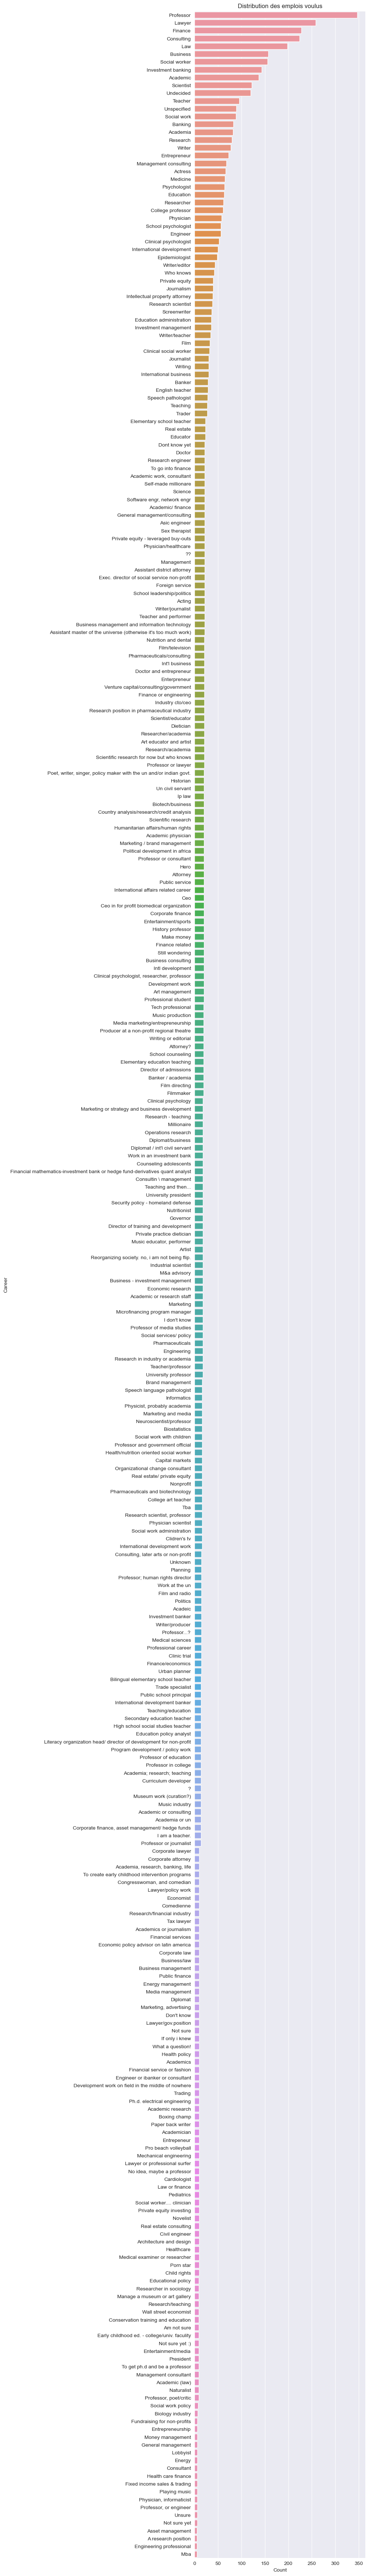

In [17]:
'''
La portion de code ci-dessus génère un graphique à barres horizontales affichant la distribution des emplois ('career') dans le DataFrame `df`. 

Explication du code :

- plt.figure(figsize=(6, 90)) : Crée une nouvelle figure de taille 6 unités de largeur x 90 unités de hauteur.
- sns.countplot(y='career', data=df, order=df['career'].value_counts().index) : Utilise la fonction countplot de la bibliothèque Seaborn pour générer un graphique de comptage. La variable 'career' est placée sur l'axe y et les données sont tirées du DataFrame df. Les emplois sont triés sur le graphique en fonction de leur fréquence d'occurrence dans le DataFrame, les plus fréquents en haut.
- plt.title('Distribution des emplois') : Donne un titre au graphique à barres.
- plt.xlabel('Count') et plt.ylabel('Career') : Définit les labels pour les axes x et y du diagramme.

Le graphique indiquera combien de fois chaque unique valeur de 'career' apparaît dans le DataFrame.

'''

# Code
plt.figure(figsize=(6, 90))
sns.countplot(y='career', data=df, order=df['career'].value_counts().index)
plt.title('Distribution des emplois voulus')
plt.xlabel('Count')
plt.ylabel('Career')

# Top des postes

Text(0, 0.5, 'Career')

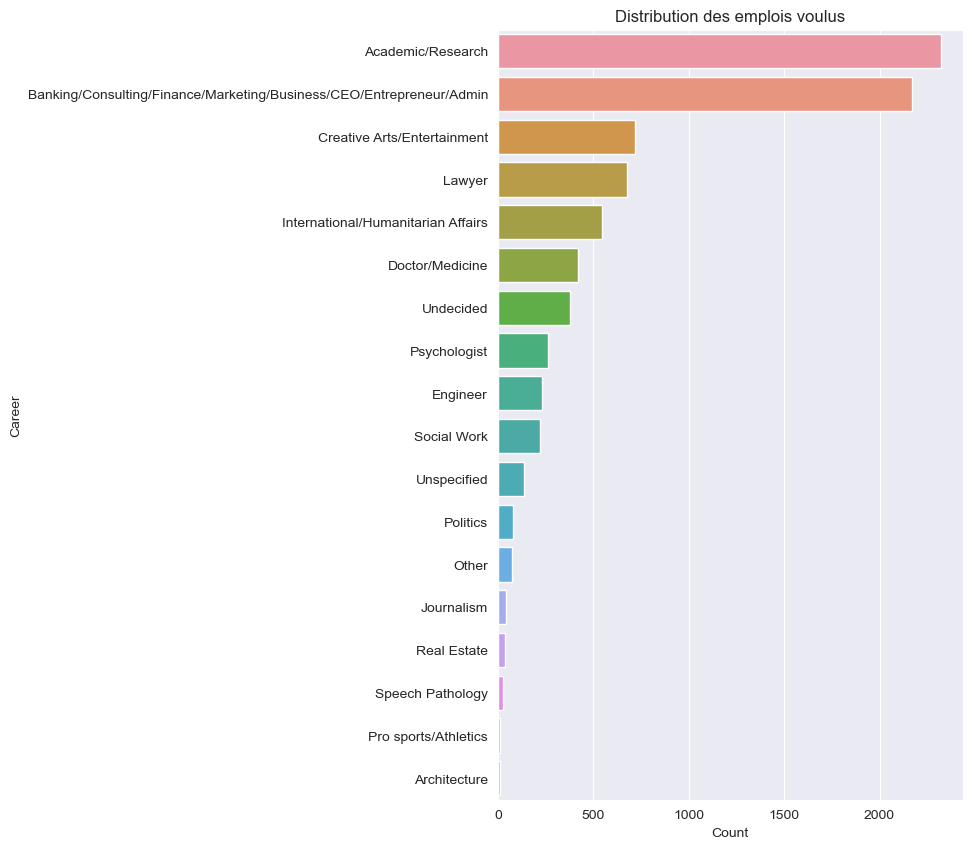

In [18]:
'''
La portion de code ci-dessus génère un graphique à barres horizontales affichant la distribution des emplois ('career') dans le DataFrame `df`. 

Explication du code :

- plt.figure(figsize=(6, 90)) : Crée une nouvelle figure de taille 6 unités de largeur x 90 unités de hauteur.
- sns.countplot(y='career', data=df, order=df['career'].value_counts().index) : Utilise la fonction countplot de la bibliothèque Seaborn pour générer un graphique de comptage. La variable 'career' est placée sur l'axe y et les données sont tirées du DataFrame df. Les emplois sont triés sur le graphique en fonction de leur fréquence d'occurrence dans le DataFrame, les plus fréquents en haut.
- plt.title('Distribution des emplois') : Donne un titre au graphique à barres.
- plt.xlabel('Count') et plt.ylabel('Career') : Définit les labels pour les axes x et y du diagramme.

Le graphique indiquera combien de fois chaque unique valeur de 'career' apparaît dans le DataFrame.

'''

plt.figure(figsize=(6, 10))

df['career_c'] = df['career_c'].apply(lambda x: career_codes.get(x, 'Unspecified'))

sns.countplot(y='career_c', data=df, order=df['career_c'].value_counts().index)
plt.title('Distribution des emplois voulus')
plt.xlabel('Count')
plt.ylabel('Career')

## Comment sont répartis les matchs selon les genres ?

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 8372 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35   fie

In [20]:
grouped_df = df.select_dtypes(include=['float64', 'int64']).groupby(df['career']).mean()

Moyenne rdv par homme: 15.1		Moyenne rdv par femme: 15.3
Moyenne pourcentage match homme: 20.29	Moyenne pourcentage match femme: 20.91


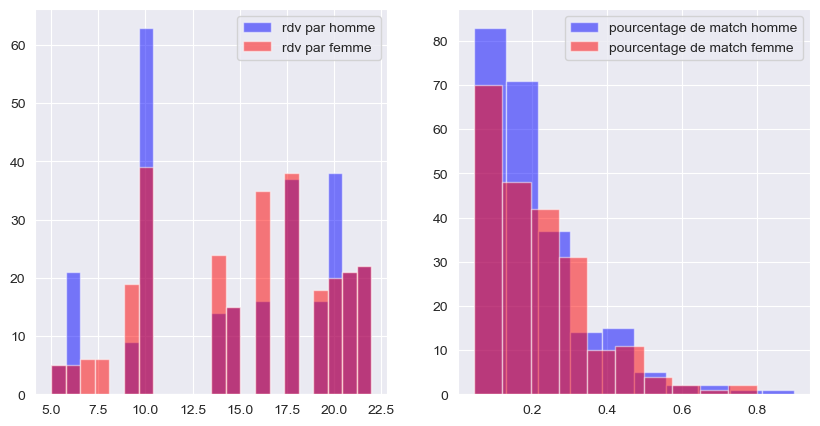

In [21]:
"""
Script pour analyser les statistiques de rendez-vous et les pourcentages de match dans un ensemble de données de speed-dating.
Ce script fait les choses suivantes :

- Filtrer les données par genre.
- Calculer le nombre de rendez-vous par genre.
- Tracer le nombre de rendez-vous par homme et par femme.
- Calculer le nombre de matchs par genre.
- Calculer le pourcentage de matchs par genre.
- Tracer le pourcentage de matchs par genre.
- Afficher les valeurs moyennes de rendez-vous et de pourcentages de matchs par genre.

"""

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df_homme = df[df.gender == 1]
df_femme = df[df.gender == 0]

nbr_rdv_homme = df_homme.groupby('iid').size()
nbr_rdv_femme = df_femme.groupby('iid').size()

# Utiliser color='red' pour les hommes et color='blue' pour les femmes
axes[0].hist(nbr_rdv_homme, bins=22, alpha=0.5, label='rdv par homme', color='blue')
axes[0].hist(nbr_rdv_femme, bins=22, alpha=0.5, label='rdv par femme', color='red')
axes[0].legend(loc='upper right')

matches_homme = df_homme[df_homme.match == 1].groupby('iid').size()
matches_femme = df_femme[df_femme.match == 1].groupby('iid').size()

pourcentage_match_homme = (matches_homme / nbr_rdv_homme).dropna()
pourcentage_match_femme = (matches_femme / nbr_rdv_femme).dropna()

# Utiliser color='red' pour les hommes et color='blue' pour les femmes
axes[1].hist(pourcentage_match_homme, alpha=0.5, label='pourcentage de match homme', color='blue')
axes[1].hist(pourcentage_match_femme, alpha=0.5, label='pourcentage de match femme', color='red')
axes[1].legend(loc='upper right')

print(
    'Moyenne rdv par homme: {0:.1f}\t\tMoyenne rdv par femme: {1:.1f}\nMoyenne pourcentage match homme: {2:.2f}\tMoyenne pourcentage match femme: {3:.2f}'.format(
        nbr_rdv_homme.mean(),
        nbr_rdv_femme.mean(),
        pourcentage_match_homme.mean() * 100.0,
        pourcentage_match_femme.mean() * 100.0))

### Les intérêts communs sont-ils plus importants qu’une origine raciale commune ?

Text(0.5, 1.0, "Distribution de l'origine ethnique")

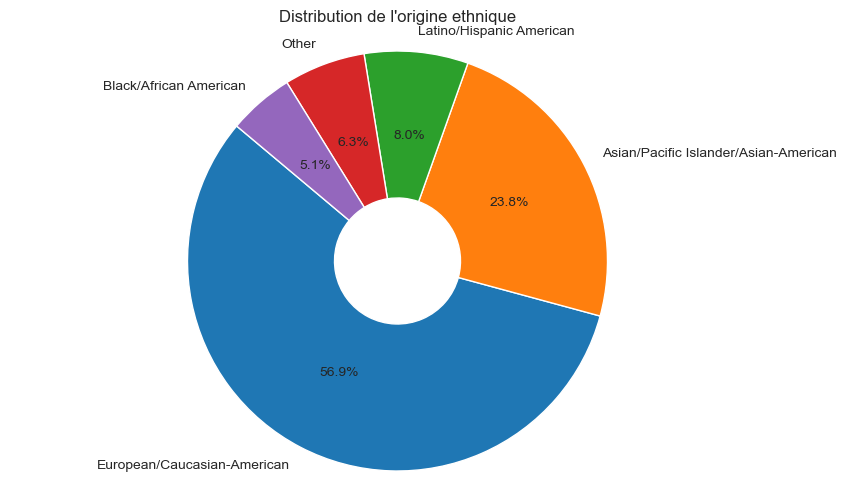

In [22]:
"""
Ce bloc de code crée un diagramme circulaire montrant la distribution de l'origine ethnique dans un DataFrame.

Explication détaillée du code :

- df_mapped = df.copy() : Crée une copie du DataFrame original 'df' et l'assigne à la variable 'df_mapped'.
- mapping_dict = {...} : Crée un dictionnaire pour mapper les codes numériques de la colonne 'race' aux noms des catégories correspondantes.
- df_mapped['race'] = df_mapped['race'].map(mapping_dict) : Remappe les codes numériques dans la colonne 'race' du DataFrame 'df_mapped' aux noms des catégories correspondantes en utilisant 'mapping_dict'.
- comptes_race = df_mapped['race'].value_counts() : Compte le nombre d'occurrences de chaque catégorie dans la colonne remappée 'race'.
- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifique.
- plt.pie(...) : Crée un diagramme à secteurs qui montre la distribution de l'origine ethnique.
- plt.axis('equal') : Assure que le diagramme à secteurs est circulaire.
- plt.title("Distribution de l'origine ethnique") : Ajoute un titre à la figure.

Arguments :
    df (pandas.DataFrame): Un DataFrame qui contient une colonne 'race' avec des codes numériques à remapper.

Resultat :
    Affiche un diagramme circulaire montrant la distribution de l'origine ethnique.
"""

df_mapped = df.copy()

mapping_dict = {1: 'Black/African American',
                2: 'European/Caucasian-American',
                3: 'Latino/Hispanic American',
                4: 'Asian/Pacific Islander/Asian-American',
                5: 'Native American',
                6: 'Other'}

df_mapped['race'] = df_mapped['race'].map(mapping_dict)

comptes_race = df_mapped['race'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(comptes_race, labels=comptes_race.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.7))
plt.axis('equal')
plt.title("Distribution de l'origine ethnique")

Text(0.5, 1.0, "Distribution de l'échelle d'importance de l'origine ethnique (de 1 à 10)")

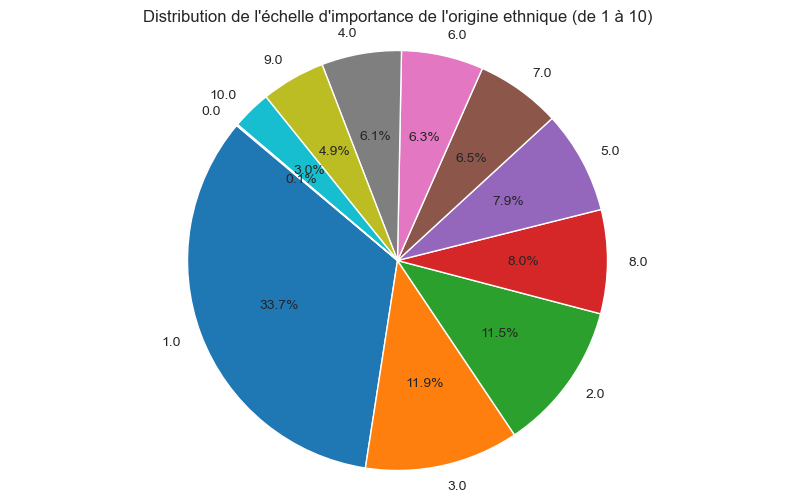

In [23]:
"""
Ce bloc de code crée un diagramme circulaire montrant la distribution de l'importance de l'origine ethnique dans un DataFrame, en fonction des valeurs dans la colonne 'imprace'.

Explication détaillée du code :

- race_imp = df['imprace'].value_counts() : Compte le nombre d'occurrences de chaque note unique dans la colonne 'imprace'.
- plt.figure(figsize=(10, 6)) : Crée une nouvelle figure avec une taille spécifique.
- plt.pie(...) : Crée un diagramme à secteurs basé sur les comptes obtenus précédemment.
- plt.axis('equal') : Assure que le diagramme à secteurs est circulaire.
- plt.title("Distribution de l'échelle d'importance de l'origine ethnique (de 1 à 10)") : Ajoute un titre à la figure.

Arguments :
    df (pandas.DataFrame): Un DataFrame qui contient une colonne 'imprace' avec des notes indiquant l'importance de l'origine ethnique.

Résultat :
    Affiche un diagramme circulaire montrant la distribution de l'importance de l'origine ethnique.
"""

race_imp = df['imprace'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(race_imp, labels=race_imp.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribution de l'échelle d'importance de l'origine ethnique (de 1 à 10)")

#### Intérèts partagés

In [24]:
"""
Ce script effectue un sous-ensemble de la DataFrame 'df' en excluant certaines colonnes. Les nouvelles DataFrames sont ensuite concaténées pour former une nouvelle DataFrame 'date'.

Explication du code :

- data_1 à data_8 : Stocke différents sous-ensembles de 'df' en excluant certaines colonnes. Il utilise la fonction iloc pour indexer par position en spécifiant les plages de colonnes à inclure.

- date = pd.concat([...], axis=1) : Concatène les sous-ensembles de DataFrames précédemment créés en les alignant le long de l'axe des colonnes (axis=1). La première colonne (avec un index de 0) et la troisième colonne (avec un index de 2) de 'df' sont également incluses. La DataFrame résultante est stockée dans la variable 'date'.

- date.head() : Affiche les cinq premières lignes de la DataFrame 'date' pour vérifier que les opérations de sous-ensemble et de concaténation ont été effectuées correctement.

Après l'exécution de ce script, la variable 'date' contiendra un sous-ensemble de 'df', avec certaines colonnes exclues.
"""

data_1 = df.iloc[:, 11:28]
data_2 = df.iloc[:,30:35]
data_3 = df.iloc[:, 39:43]
data_4 = df.iloc[:, 45:67]
data_5 = df.iloc[:, 69:74]
data_6 = df.iloc[:, 87:91]
data_7 = df.iloc[:, 97:102]
data_8 = df.iloc[:, 104:107]


date = pd.concat([df.iloc[:, 0],df.iloc[:, 2],data_1,data_2,data_3,data_4,data_5,
                  data_6,data_7,data_8], axis=1)
date.head()

iid  gender   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0    1       0  11.0      0      0.14         0   27.0     2.0      35.0   
1    1       0  12.0      0      0.54         0   22.0     2.0      60.0   
2    1       0  13.0      1      0.16         1   22.0     4.0      19.0   
3    1       0  14.0      1      0.61         0   23.0     2.0      30.0   
4    1       0  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  ...  fun3_1  intel3_1  dec  attr  sinc  intel  fun  like  prob  \
0      20.0  ...     8.0       8.0    1   6.0   9.0    7.0  7.0   7.0   6.0   
1       0.0  ...     8.0       8.0    1   7.0   8.0    7.0  8.0   7.0   5.0   
2      18.0  ...     8.0       8.0    1   5.0   8.0    9.0  8.0   7.0   5.0   
3       5.0  ...     8.0       8.0    1   7.0   6.0    8.0  7.0   7.0   6.0   
4      10.0  ...     8.0       8.0    1   5.0   6.0    7.0  7.0   6.0   6.0   

   met  
0  2.0  
1  1.0  
2  1.0  
3  2.0  
4  2.0  

[5 rows x 67 columns]

In [25]:
# compter les valeurs nulles
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     305
fun_o       359
like_o      250
prob_o      317
met_o       385
age           0
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career        0
career_c      0
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr          0
sinc          0
intel   

In [26]:
"""
Cette ligne de code crée une nouvelle DataFrame 'date2' qui est une copie de 'date', après avoir supprimé toutes les lignes contenant au moins une valeur manquante.

Explication du code :

- date.dropna() : La méthode dropna() de pandas est utilisée pour supprimer (ou "drop") toutes les lignes de la DataFrame 'date' qui contiennent au moins une valeur manquante (NaN).
- date2 = date.dropna() : Le résultat de la méthode dropna() est assigné à la nouvelle variable 'date2'. Par conséquent, 'date2' est une copie de 'date' mais sans aucune ligne contenant des valeurs manquantes.

Après l'exécution de cette ligne de code, vous obtiendrez une nouvelle DataFrame 'date2' qui est identique à 'date', mais sans aucune valeur manquante.
"""

date2 = date.dropna()

In [27]:
"""
Ce script crée une nouvelle DataFrame 'date3' qui est une copie de 'date2' après avoir supprimé les colonnes 'field', 'from' et 'career'.

Explication du code :

- date2.drop(['field', 'from', 'career'], axis=1) : Appelle la méthode drop() sur la DataFrame 'date2' en passant une liste contenant les noms des colonnes à supprimer et en spécifiant axis=1 pour indiquer que des colonnes doivent être supprimées.

- date3 = date2.drop(['field', 'from', 'career'], axis=1) : Le résultat de l'appel à drop() est assigné à la nouvelle variable 'date3'. 

La DataFrame résultante 'date3' ne contient pas les colonnes 'field', 'from' et 'career' présentes dans 'date2'. 
"""

date3 = date2.drop(['field', 'from', 'career', 'career_c'], axis=1)

In [28]:
date3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7176 entries, 0 to 8377
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       7176 non-null   int64  
 1   gender    7176 non-null   int64  
 2   pid       7176 non-null   float64
 3   match     7176 non-null   int64  
 4   int_corr  7176 non-null   float64
 5   samerace  7176 non-null   int64  
 6   age_o     7176 non-null   float64
 7   race_o    7176 non-null   float64
 8   pf_o_att  7176 non-null   float64
 9   pf_o_sin  7176 non-null   float64
 10  pf_o_int  7176 non-null   float64
 11  pf_o_fun  7176 non-null   float64
 12  pf_o_amb  7176 non-null   float64
 13  pf_o_sha  7176 non-null   float64
 14  dec_o     7176 non-null   int64  
 15  attr_o    7176 non-null   float64
 16  sinc_o    7176 non-null   float64
 17  intel_o   7176 non-null   float64
 18  fun_o     7176 non-null   float64
 19  like_o    7176 non-null   float64
 20  prob_o    7176 non-null   float64
 

<Axes: title={'center': 'Correlation Heatmap'}>

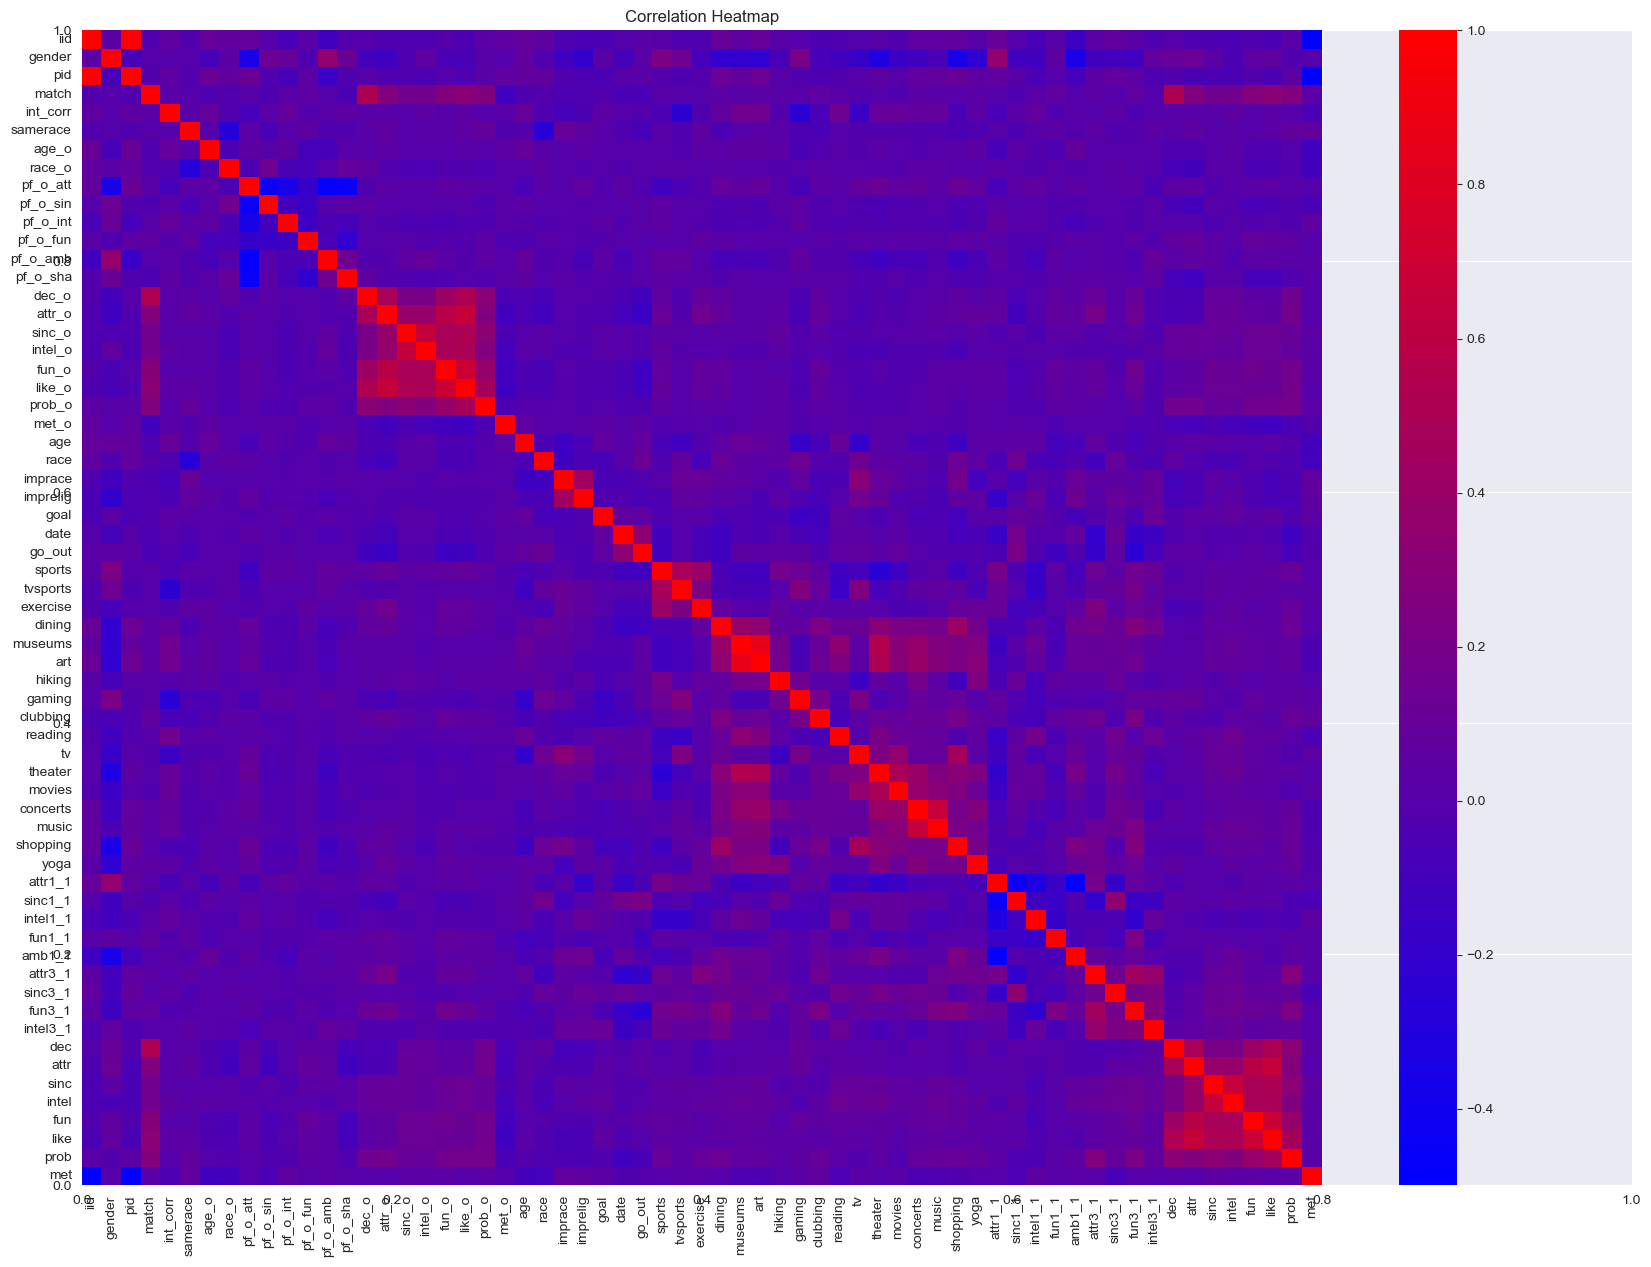

In [29]:
""" 
Ce script crée une carte de chaleur pour visualiser la corrélation entre les différentes colonnes de la DataFrame 'date3'. 

Explication du code : 

- plt.subplots(figsize=(20,15)) : Crée une nouvelle figure pour le tracé avec une taille spécifiée (largeur = 20, hauteur = 15). 

- ax = plt.axes() : Crée un nouvel axe sur lequel le tracé sera dessiné.

- ax.set_title('Correlation Heatmap') : Définit le titre de l'axe comme 'Correlation Heatmap'. 

- corr = date3.corr() : Calcule la corrélation entre toutes les paires de colonnes de la DataFrame 'date3'. Les résultats sont stockés dans 'corr'. 

- sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values) : Utilise la bibliothèque seaborn pour créer une carte de chaleur. La matrice de corrélation 'corr' est passée en tant que données à visualiser. Les étiquettes d'axe 'x' et 'y' sont définies sur les noms des colonnes de 'corr'. 

Après l'exécution de ce script, un tracé de carte de chaleur sera affiché illustrant la corrélation entre les différentes colonnes de la DataFrame 'date3'. 
"""

plt.subplots(figsize=(20, 15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')

# Définir une colormap linéaire qui va de bleu à rouge
cmap = LinearSegmentedColormap.from_list('custom blue-red', ['blue', 'red'], N=256)

corr = date3.corr()
sns.heatmap(corr,
            cmap=cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## EXaminons la dépendance de certaines variables

In [30]:
"""
Dans ce morceau de code, je calcule les coefficients de corrélation entre les variables 'samerace', 'imprace' et 'pf_o_sha' de mon jeu de données.

Je commence par calculer la corrélation entre 'samerace' et 'imprace', ensuite je calcule la corrélation entre 'samerace' et 'pf_o_sha'. Enfin, je calcule la corrélation entre 'imprace' et 'pf_o_sha'.

Chaque estimation de corrélation est stockée dans une variable séparée : correlation_samerace_imprace, correlation_samerace_pf_o_sha, et correlation_imprace_pf_o_sha, respectivement.

Ensuite, j'affiche les résultats des coefficients de corrélation à l'aide de la fonction print. Une valeur de corrélation proche de 1 indique une forte corrélation positive, une valeur proche de -1 indique une forte corrélation négative et une valeur proche de 0 indique l'absence de corrélation.

Il est important de noter que la corrélation ne signifie pas nécessairement la causalité. 
"""

correlation_samerace_imprace = date['samerace'].corr(date['imprace'])
correlation_samerace_pf_o_sha = date['samerace'].corr(date['pf_o_sha'])
correlation_imprace_pf_o_sha = date['imprace'].corr(date['pf_o_sha'])

print(f"Correlation entre 'samerace' et 'imprace': {correlation_samerace_imprace}")
print(f"Correlation entre 'samerace' et 'pf_o_sha': {correlation_samerace_pf_o_sha}")
print(f"Correlation entre 'imprace' et 'pf_o_sha': {correlation_imprace_pf_o_sha}")

Correlation entre 'samerace' et 'imprace': 0.09073140091237183
Correlation entre 'samerace' et 'pf_o_sha': -0.016073641864818845
Correlation entre 'imprace' et 'pf_o_sha': 0.013348984755864437


D'après les résultats des corrélations que j'ai calculées, je peux observer les relations entre 'samerace', 'imprace' et 'pf_o_sha'.


La correlation entre 'samerace' et 'imprace' est de 0.091, ce qui indique une faible relation positive entre ces deux variables. Cela signifie que lorsque la valeur de 'samerace' augmente, la valeur de 'imprace' a tendance à augmenter légèrement, et vice versa.


En ce qui concerne la corrélation entre 'samerace' et 'pf_o_sha', elle est de -0.016. Ce chiffre est très proche de zéro, ce qui suggère qu'il n'y a pas de connexion significative entre ces deux variables. 

Une valeur négative indique qu'il y a une très faible tendance pour les deux variables à se déplacer dans des directions opposées - c'est-à-dire lorsque 'samerace' augmente, 'pf_o_sha' a tendance à diminuer légèrement, et vice versa.


Enfin, la corrélation entre 'imprace' et 'pf_o_sha' est de 0.013. Ceci est également très proche de zéro, ce qui indique que ces deux variables ne sont pas fortement corrélées l'une à l'autre.


Cependant, il est important de se rappeler que la corrélation ne signifie pas causalité. Même si deux variables sont fortement corrélées, cela ne signifie pas que l'une cause l'autre. De plus, il faut également prendre en compte le risque d'erreurs dues à la multiplicité des tests réalisés.

In [31]:
"""
Dans ce morceau de code, je calcule les coefficients de corrélation entre les variables 'samerace', 'imprace' et 'pf_o_sha' de mon jeu de données.

Je commence par calculer la corrélation entre 'samerace' et 'imprace', ensuite je calcule la corrélation entre 'samerace' et 'pf_o_sha'. Enfin, je calcule la corrélation entre 'imprace' et 'pf_o_sha'.

Chaque estimation de corrélation est stockée dans une variable séparée : correlation_samerace_imprace, correlation_samerace_pf_o_sha, et correlation_imprace_pf_o_sha, respectivement.

Ensuite, j'affiche les résultats des coefficients de corrélation à l'aide de la fonction print. Une valeur de corrélation proche de 1 indique une forte corrélation positive, une valeur proche de -1 indique une forte corrélation négative et une valeur proche de 0 indique l'absence de corrélation.

Il est important de noter que la corrélation ne signifie pas nécessairement la causalité. 
"""
# 'samerace' est une variable catégorielle
date['samerace'] = date['samerace'].astype('category')

# équation de la formule. 
# C'est LHS ~ RHS où LHS est la variable dépendante et RHS est la variable indépendante.
formula = 'imprace ~ C(samerace)'

# modèle Ordinary Least Squares
model = ols(formula, data=date).fit()

# table anova
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq      df          F        PR(>F)
C(samerace)    552.800229     1.0  68.819599  1.248720e-16
Residual     66598.276583  8291.0        NaN           NaN


D'après les résultats de l'analyse de variance (ANOVA) que j'ai effectuée, je constate que l'effet de la variable 'samerace' sur la variable dépendante est significatif. 

a somme des carrés entre les groupes (sum_sq) pour 'samerace' est de 552.8, ce qui indique la variabilité attribuée à la différence entre les groupes définis par 'samerace'.

De plus, la statistique F pour 'samerace' est de 68.82, qui est assez élevée, suggérant que la variation entre les groupes est significativement plus grande que celle à l'intérieur des groupes.

Enfin, la valeur p (PR(>F)) pour 'samerace' est extrêmement petite (1.25e-16), bien en-dessous du niveau de signification standard de 0.05, ce qui me permet de rejeter l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre les groupes en termes de leur moyenne. Par conséquent, j'en conclus qu'il existe un impact significatif de 'samerace' sur la variable dépendante dans mon analyse.

### Regression linéaire

In [32]:
"""
Ce bloc de code effectue une régression linéaire simple à l'aide de la bibliothèque de sklearn en utilisant 'samerace' et 'imprace' comme variables indépendantes X, et 'pf_o_sha' comme variable dépendante Y. 

Descriptive détaillée du code :

- X = date[['samerace', 'imprace']], y = date['pf_o_sha'] : Sélectionne les colonnes requises et les assigne aux variables X et Y.
- SimpleImputer(...) : Initialise un objet imputer, qui est utilisé pour remplacer les valeurs manquantes.
- X_imputed = imputer.fit_transform(X) : Utilise l'imputer pour remplacer les valeurs manquantes dans X par la moyenne de chaque colonne.
- y_imputed = ... : Fait la même chose que la ligne précédente, mais pour la variable Y.
- train_test_split(...) : Partage l'ensemble de données en ensembles de données d'apprentissage et de test.
- regressor = LinearRegression(), regressor.fit(...) : Crée un objet de régression linéaire, puis entraîne le modèle en utilisant les ensembles de données d'apprentissage.
- y_pred = regressor.predict(X_test) : Prédit les valeurs Y sur l'ensemble de test à l'aide du modèle entraîné.
- print(...) : Imprime les coefficients de régression, l'interception et l'erreur quadratique moyenne (MSE) pour évaluer la performance du modèle.

Arguments:
    date (pandas.DataFrame): DataFrame contenant les colonnes 'samerace', 'imprace' et 'pf_o_sha'.

Résultat :
    Affiche les coefficients de régression, l'interception et l'erreur quadratique moyenne (MSE) de la régression linéaire effectuée.
"""

X = date[['samerace', 'imprace']]
y = date['pf_o_sha']

# Création de l'imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Remplacement des NaN par la moyenne de la colonne pour X
X_imputed = imputer.fit_transform(X)

# Remplacement des NaN par la moyenne de la colonne pour y
y_imputed = imputer.fit_transform(y.values.reshape(-1,1))
y_imputed = y_imputed.ravel()  # Convertir le tableau en 1D

# On divise l'ensemble de données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=0)

# On crée le modèle de régression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # On entraîne le modèle avec les données d'entraînement

# On fait une prévision sur l'ensemble de test
y_pred = regressor.predict(X_test)

# Imprimer les coefficients de régression et l'interception
print('Coefficients: ', regressor.coef_)
print('Interception: ',regressor.intercept_)

# Evaluer la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Coefficients:  [-0.10916257  0.03789393]
Interception:  11.73474337332456
Mean Squared Error:  39.328906368340846


En analysant les résultats de la régression linéaire, je peux dire que les coefficients de 'samerace' et 'imprace' sont respectivement -0.109 et 0.0379.

Cela signifie qu'une unité d'augmentation en 'samerace' est associée à une diminution de 0.109 en 'pf_o_sha', toutes choses étant égales par ailleurs. De même, une unité d'augmentation en 'imprace' est associée à une augmentation de 0.0379 en 'pf_o_sha', toutes choses étant égales par ailleurs.


La valeur d'interception est 11.7347. Cela signifie que si les variables 'samerace' et 'imprace' sont toutes deux à zéro, la valeur attendue de 'pf_o_sha' sera 11.7347.


En ce qui concerne l'erreur quadratique moyenne (MSE), j'ai obtenu une valeur de 39.3289. Le MSE est une mesure de la qualité d'un estimateur et en l'occurrence, nous cherchons à minimiser cette valeur. Plus la valeur de MSE est faible, plus les prédictions de mon modèle sont proches des valeurs réelles. Cependant, il est aussi important de noter que la valeur de MSE est fortement influencée par les valeurs aberrantes et que de ce fait, une grande valeur de MSE peut aussi indiquer la présence de telles valeurs aberrantes dans les données.


Enfin, il est important de mettre ces résultats en contexte. La signification et l'importance de ces valeurs dépendent largement du contexte spécifique de l'analyse et des variables en question. La régression linéaire est un outil puissant, mais son interprétation exige une réflexion soigneuse et une connaissance approfondie du sujet que l'on étudie.

### Quels sont les attributs les moins désirables chez un partenaire masculin ? Est-ce différent pour les partenaires féminines ?

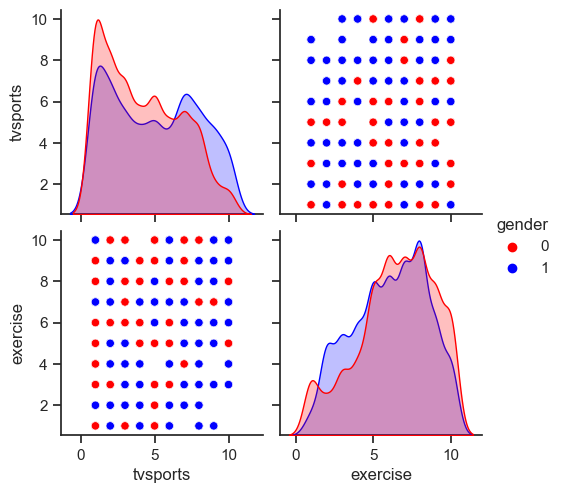

In [33]:
"""
Ce script analyse la correspondance des intérêts entre les sports et les sports à la télévision. 

Explication du code :

- sns.set(style='ticks', color_codes=True) : Configure le style Seaborn par défaut pour les tracés, ici le style est spécifié comme "ticks" et l'utilisation des codes couleur est activée. 

- date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 30:32]], axis = 1) : Cette ligne concatène la deuxième colonne (indice 1 en Python qui commence à partir de 0) de la DataFrame `date3` avec les colonnes 31 et 32, en le long de l'axe des colonnes (axis = 1). Le résultat est stocké dans la variable `date_int`. 

- g = sns.pairplot(date_int, hue='gender') : crée un ensemble de tracés de paires à partir de la DataFrame `date_int`. Les graphes sont colorés en fonction des valeurs de la colonne 'gender'.

Le résultat est un ensemble de tracés de paires illustrant la correspondance des intérêts entre les sports et les sports à la télévision, pour les différents genres.
"""

sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 30:32]], axis = 1)
g = sns.pairplot(date_int, hue='gender', palette=['red', 'blue'])

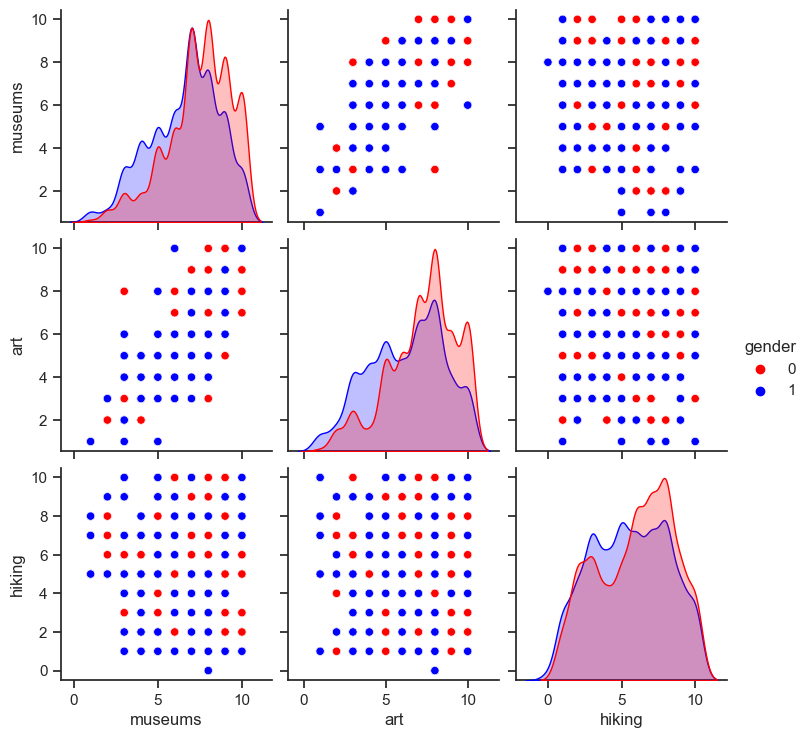

In [34]:
"""
Ce script crée un graphique 'pairplot' avec Seaborn pour visualiser les relations entre 'dining', 'museums' et 'arts' dans la DataFrame 'date3', en coloriant les points en fonction de la colonne 'gender'. 

Explication du code :

- sns.set(style='ticks', color_codes=True) : Définit le style des graphiques de Seaborn, avec un style 'ticks' et l'activation des codes de couleur.

- date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 33:36]], axis = 1) : Crée une DataFrame 'date_int' qui contient la deuxième colonne (indexée à 1) et les colonnes 34 à 36 de 'date3'. 

- g = sns.pairplot(date_int, hue='gender', palette=['red', 'blue']) : Crée un 'pairplot' de 'date_int', en coloriant les points de chaque paire de colonnes en fonction de la valeur de 'gender'. La palette de couleurs utilisée pour distinguer les sexes est définie comme ['red', 'blue], ce qui signifie que les points correspondant à une valeur de 'gender' seront rouges et les points correspondant à l'autre valeur seront bleus.

Après l'exécution de ce script, un 'pairplot' sera affiché pour visualiser les relations entre 'dining', 'museums' et 'arts', avec des couleurs différentes pour les points en fonction du 'gender' de chaque observation.
"""

sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 33:36]], axis = 1)
sns.pairplot(date_int, hue='gender', palette=['red', 'blue'])

In [35]:
"""
Ce bloc de code analyse les préférences des hommes et des femmes en matière de partenaires potentiels en se basant sur cinq attributs : l'attrait, la sincérité, l'intelligence, l'amusement, et l'ambition. Le code calcule également l'attribut le moins désirable pour chaque genre.

Explication détaillée du code :

- attributs_perso = [...] : Liste des noms des attributs dans le DataFrame.
- date_homme, date_femme = ... : Séparer le DataFrame en deux sous-ensembles basés sur le genre.
- print(..., .isnull().sum()) : Vérifie et imprime le nombre de valeurs non attribuées (NaN) pour chaque attribut pour chaque genre.
- print(..., .mean()) : Calcule et imprime la moyenne des notes pour chaque attribut pour chaque genre.
- attribut_moins_desirable = ... : Identifie l'attribut le moins désirable (c'est-à-dire ayant la note moyenne la plus basse) pour chaque genre.
- print(...) : Affiche l'attribut le moins désirable pour chaque genre.

Arguments:
    date (pandas.DataFrame): DataFrame contenant les colonnes de genre et d'attributs personnels.

Résultat :
    Ne renvoie rien, mais imprime les moyennes des notes d'attributs pour chaque genre et l'attribut le moins désirable pour chaque genre.
"""

attributs_perso = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1"]

date_homme = date[date['gender'] == 1]
date_femme = date[date['gender'] == 0]

print("Nombre de valeurs NaN pour chaque attribut chez les hommes : ")
print(date_homme[attributs_perso].isnull().sum())
print()
print("Nombre de valeurs NaN pour chaque attribut chez les femmes : ")
print(date_femme[attributs_perso].isnull().sum())

print("Moyennes des attributs pour les hommes : ")
print(date_homme[attributs_perso].mean())
print()
print("Moyennes des attributs pour les femmes : ")
print(date_femme[attributs_perso].mean())

attribut_moins_desirable_homme = date_homme[attributs_perso].mean().idxmin()
attribut_moins_desirable_femme = date_femme[attributs_perso].mean().idxmin()

print("Attribut moins désirable pour les hommes (d'après leurs propres notes) : ", attribut_moins_desirable_homme)
print("Attribut moins désirable pour les femmes (d'après leurs propres notes) : ", attribut_moins_desirable_femme)

Nombre de valeurs NaN pour chaque attribut chez les hommes : 
attr1_1     20
sinc1_1     20
intel1_1    20
fun1_1      30
amb1_1      40
dtype: int64

Nombre de valeurs NaN pour chaque attribut chez les femmes : 
attr1_1     59
sinc1_1     59
intel1_1    59
fun1_1      59
amb1_1      59
dtype: int64
Moyennes des attributs pour les hommes : 
attr1_1     26.921689
sinc1_1     16.498436
intel1_1    19.537374
fun1_1      17.763893
amb1_1       8.552829
dtype: float64

Moyennes des attributs pour les femmes : 
attr1_1     18.045108
sinc1_1     18.331673
intel1_1    20.996679
fun1_1      17.135853
amb1_1      12.845907
dtype: float64
Attribut moins désirable pour les hommes (d'après leurs propres notes) :  amb1_1
Attribut moins désirable pour les femmes (d'après leurs propres notes) :  amb1_1


Je vous remercie pour ces informations. Les résultats montrent que l'attribut 'amb1_1' est le moins désirable à la fois pour les hommes et les femmes, en se basant sur leurs propres notes.

Cela signifie que, en moyenne, les hommes et les femmes accordent le moins d'importance à l'ambition lorsqu'ils évaluent un partenaire potentiel.


C'est intéressant de noter que même si le nombre de valeurs manquantes diffère pour les hommes et les femmes, l'attribut le moins désirable reste le même pour les deux groupes.

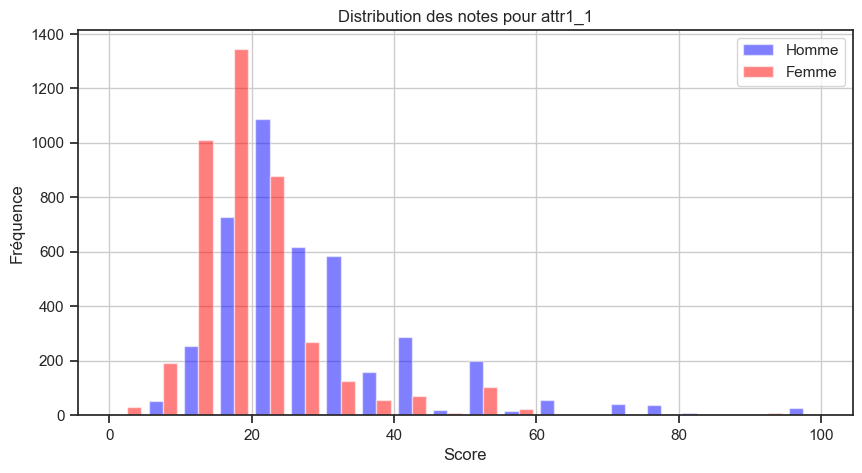

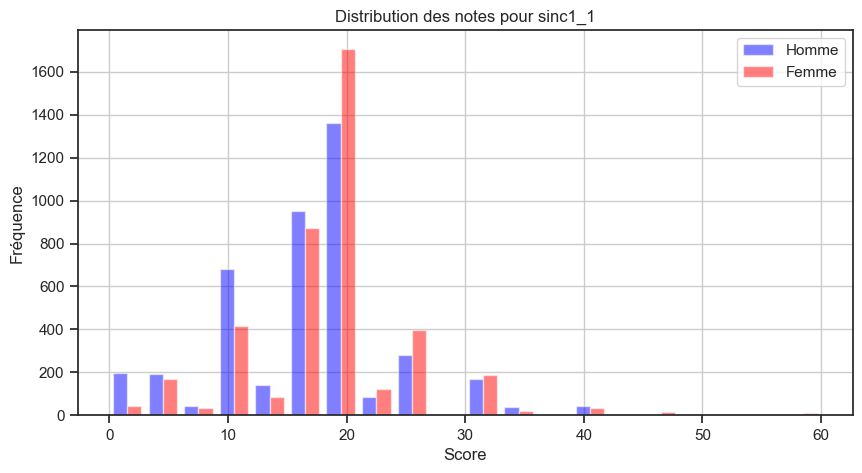

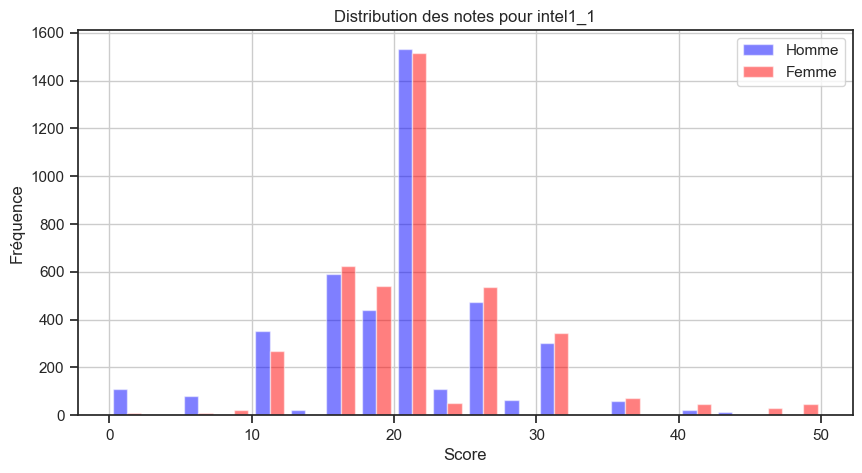

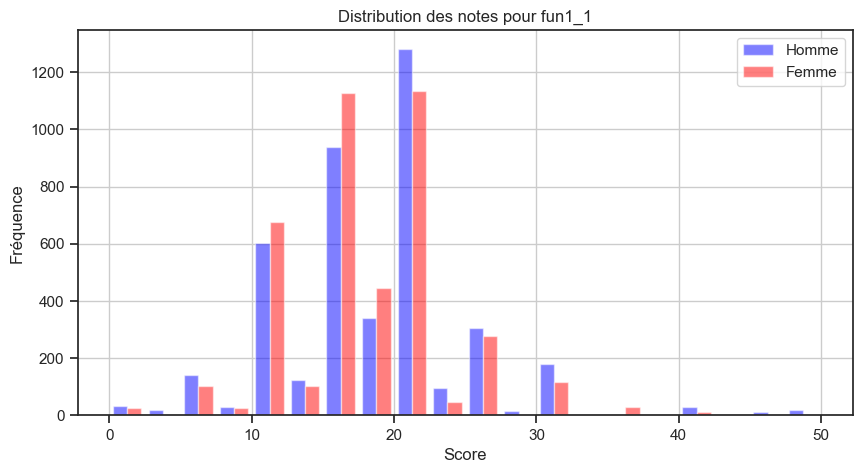

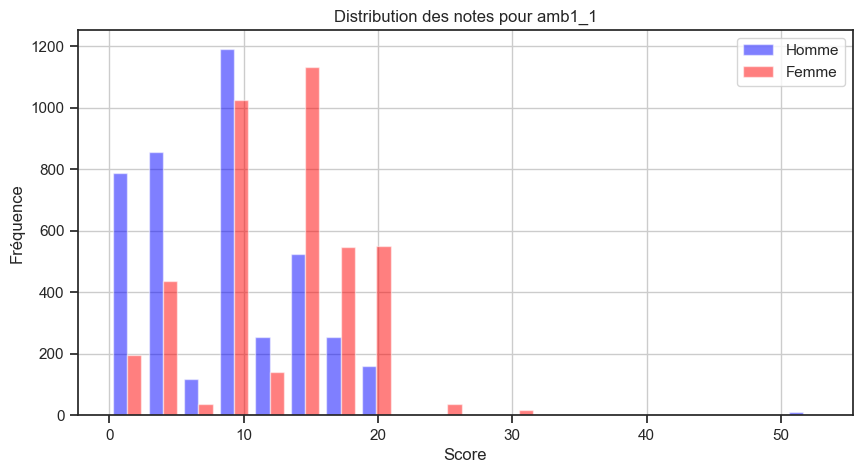

In [36]:
#Analysons la répartition de ces attributs
#Cela peut nous donner un aperçu de la façon dont les scores sont distribués.
"""
Ce bloc de code crée un histogramme pour chaque attribut personnel, montrant la distribution des scores pour l'attribut donné, séparément pour les hommes et les femmes.

Explication détaillée du code :

- La boucle for itère sur chaque attribut personnel.
- plt.figure(figsize=(10,5)) : Crée une nouvelle figure avec une taille spécifiée.
- plt.hist([date_homme[attr].dropna(), date_femme[attr].dropna()], ...) : Dessine deux histogrammes sur la même figure - un pour chaque genre. Les valeurs NaN sont exclues.
- plt.legend(loc='upper right') : Ajoute une légende à la figure, dans le coin supérieur droit.
- plt.xlabel('Score'), plt.ylabel('Fréquence') : Définissent les étiquettes pour les axes x et y, respectivement.
- plt.title('Distribution des notes pour ' + attr) : Ajoute un titre à la figure, qui varie en fonction de l'attribut broyé.
- plt.grid(True) : Ajoute une grille à la figure.

Arguments :
    date_homme (pandas.DataFrame): DataFrame contenant les attributs personnels des hommes.
    date_femme (pandas.DataFrame): DataFrame contenant les attributs personnels des femmes.
    attributs_perso (list) : Liste des attributs personnels à analyser.

Résultat :
    Affiche des histogrammes montrant la distribution des notes pour chaque attribut personnel, séparément pour les hommes et les femmes.
"""

for attr in attributs_perso:
    plt.figure(figsize=(10, 5))
    plt.hist([date_homme[attr].dropna(), date_femme[attr].dropna()], bins=20, alpha=0.5, label=['Homme', 'Femme'],
             color=['blue', 'red'])
    plt.legend(loc='upper right')
    plt.xlabel('Score')
    plt.ylabel('Fréquence')
    plt.title('Distribution des notes pour ' + attr)
    plt.grid(True)

In [37]:
#Calcule de l'attribut le plus désirable
#Nous avons trouvé l'attribut le moins désirable, mais nous pourrions aussi être intéressé par l'attribut le plus désirable.
"""
Ce bloc de code identifie l'attribut le plus désirable pour chaque genre en calculant la moyenne des scores pour chaque attribut, puis en sélectionnant l'attribut avec le score moyen le plus élevé.

Explication détaillée du code :

- attribut_plus_desirable_homme = date_homme[attributs_perso].mean().idxmax() : Calcule la moyenne des scores pour chaque attribut pour les hommes, puis sélectionne l'attribut avec le score moyen le plus élevé.
- attribut_plus_desirable_femme = date_femme[attributs_perso].mean().idxmax() : Fait la même chose, mais pour les femmes.
- print(...) : Affiche l'attribut le plus désirable pour chaque genre.

Arguments:
    date_homme (pandas.DataFrame): DataFrame contenant les attributs personnels des hommes.
    date_femme (pandas.DataFrame): DataFrame contenant les attributs personnels des femmes.
    attributs_perso (list) : Liste des attributs personnels à analyser.

Résultat :
    Affiche l'attribut le plus désirable pour chaque genre.
"""

attribut_plus_desirable_homme = date_homme[attributs_perso].mean().idxmax()
attribut_plus_desirable_femme = date_femme[attributs_perso].mean().idxmax()

print("Attribut le plus désirable pour les hommes (d'après leurs propres notes) : ", attribut_plus_desirable_homme)
print("Attribut le plus désirable pour les femmes (d'après leurs propres notes) : ", attribut_plus_desirable_femme)

Attribut le plus désirable pour les hommes (d'après leurs propres notes) :  attr1_1
Attribut le plus désirable pour les femmes (d'après leurs propres notes) :  intel1_1


In [38]:
"""
Ce bloc de code calcule et affiche les matrices de corrélation des attributs personnels pour les hommes et les femmes séparément.

Explication détaillée du code :

- corr_matrix_homme = date_homme[attributs_perso].corr() : Calcul la matrice de corrélation pour les attributs personnels des hommes.
- corr_matrix_femme = date_femme[attributs_perso].corr() : Fait la même chose, mais pour les femmes.
- print(...) : Affiche les matrices de corrélation calculées.

Arguments:
    date_homme (pandas.DataFrame): DataFrame contenant les attributs personnels des hommes.
    date_femme (pandas.DataFrame): DataFrame contenant les attributs personnels des femmes.
    attributs_perso (list) : Liste des attributs personnels à analyser.

Résultat :
    Affiche les matrices de corrélation des attributs personnels pour les hommes et les femmes séparément.
"""

corr_matrix_homme = date_homme[attributs_perso].corr()
corr_matrix_femme = date_femme[attributs_perso].corr()

print("Matrice de corrélation pour les hommes :")
print(corr_matrix_homme)
print("\nMatrice de corrélation pour les femmes :")
print(corr_matrix_femme)

Matrice de corrélation pour les hommes :
           attr1_1   sinc1_1  intel1_1    fun1_1    amb1_1
attr1_1   1.000000 -0.441353 -0.494755 -0.174559 -0.473843
sinc1_1  -0.441353  1.000000  0.034775 -0.184832  0.034349
intel1_1 -0.494755  0.034775  1.000000 -0.107849  0.048885
fun1_1   -0.174559 -0.184832 -0.107849  1.000000 -0.095253
amb1_1   -0.473843  0.034349  0.048885 -0.095253  1.000000

Matrice de corrélation pour les femmes :
           attr1_1   sinc1_1  intel1_1    fun1_1    amb1_1
attr1_1   1.000000 -0.409180 -0.120460 -0.289728 -0.300091
sinc1_1  -0.409180  1.000000 -0.302807 -0.114930 -0.142723
intel1_1 -0.120460 -0.302807  1.000000 -0.175310 -0.225341
fun1_1   -0.289728 -0.114930 -0.175310  1.000000 -0.000572
amb1_1   -0.300091 -0.142723 -0.225341 -0.000572  1.000000


Pour moi, en tant qu'homme, je vois qu'il y a une forte corrélation négative entre l'attirance (attr1_1) et l'intelligence (intel1_1), ainsi qu'entre l'attirance et la sincérité (sinc1_1). 

Cela signifie que si j'accorde une grande importance à l'attirance, je risque de donner moins d'importance à l'intelligence et à la sincérité.


Cependant, pour une femme, la plus forte corrélation négative est entre l'attirance (attr1_1) et la sincérité (sinc1_1), ainsi qu'entre l'attirance et l'ambition (amb1_1).

Cela suggère que si elle met beaucoup d'accent sur l'attirance, elle a tendance à donner moins d'importance à la sincérité et à l'ambition.


Cela donne un aperçu intéressant de comment les hommes et les femmes pondèrent différentes qualités lorsqu'ils évaluent des partenaires potentiels.

Cependant, il est important de rappeler que ceci ne s'applique pas de manière universelle, puisque les préférences individuelles peuvent varier.


Si je veux approfondir l'analyse, je pourrais examiner comment ces préférences varient en fonction d'autres facteurs, comme l'âge, l'éducation ou la race/ethnicité.

Ou, je pourrais examiner comment mes préférences sont liées à mon succès en matière de rencontres, c'est-à-dire combien de partenaires potentiels ont exprimé une volonté de me revoir.

approfondissons encore plus l'analyse.
Pour cela, nous allons utiliser la méthode d'analyse appelée Analyse des Composantes Principales (PCA).


L'Analyse des Composantes Principales (PCA en anglais pour Principal Component Analysis) est une méthode d'analyse multivariée qui permet de combiner nos cinq variables (attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1) en deux nouvelles variables : la composante principale 1 (PC1) et la composante principale 2 (PC2).

Ces deux nouvelles variables conservent la majeure partie de l'information (c'est-à-dire de la variabilité) contenue dans les cinq variables originales.

Cette transformation nous permet de visualiser nos données dans un graphique bidimensionnel, tout en conservant une grande partie de l'information contenue dans les cinq dimensions originales.

Composante principale 1 pour les hommes:  [ 0.90331724 -0.36359668  0.00679692 -0.16172803 -0.16004143]
Composante principale 2 pour les hommes:  [-0.21521776 -0.5008567   0.83748444 -0.00340914 -0.03784282]


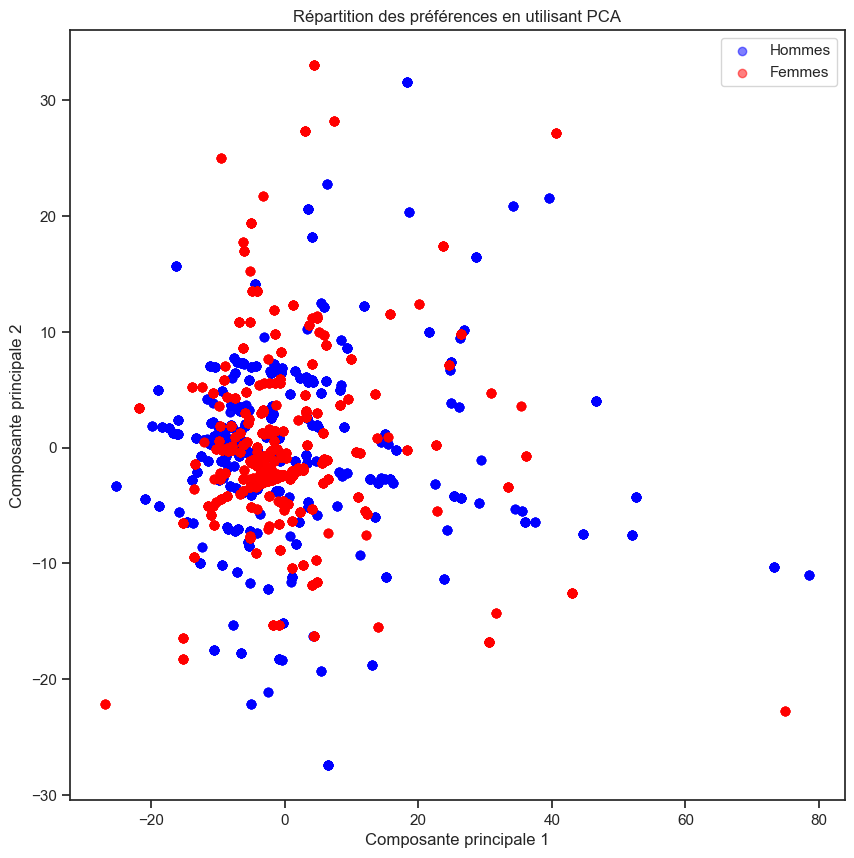

In [39]:
"""
Ce bloc de code utilise l'Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité des données d'attributs personnels des hommes et des femmes. Il trace ensuite les deux premières composantes principales pour les hommes et les femmes sur un graphique de dispersion.

Explication détaillée du code :

- pca = PCA(n_components=2) : Initialise un objet PCA qui conservera les deux composantes principales les plus significatives.
- pca_homme = pca.fit_transform(date_homme[attributs_perso].dropna()) : Applique l'ACP aux données des hommes après avoir éliminé les valeurs manquantes.
- pca_femme = pca.fit_transform(date_femme[attributs_perso].dropna()) : Fait la même chose, mais pour les données des femmes.
- plt.figure(figsize=(10, 10)) : Crée une nouvelle figure avec une taille spécifiée.
- plt.scatter(...) : Trace les deux premières composantes principales pour les hommes et les femmes sur le même graphique de dispersion, avec des couleurs différentes pour chaque groupe.
- plt.title(...), plt.xlabel(...), plt.ylabel(...) : Ajoute un titre et des étiquettes pour les axes x et y.
- plt.legend() : Ajoute une légende à la figure.
- print(...) : Affiche la composition des deux premières composantes principales pour l'ensemble de données des hommes.

Arguments :
    date_homme (pandas.DataFrame): DataFrame contenant les attributs personnels des hommes.
    date_femme (pandas.DataFrame): DataFrame contenant les attributs personnels des femmes.
    attributs_perso (list): Liste des attributs personnels à analyser.

Résultat :
    Affiche un graphique de dispersion des deux premières composantes de l'ACP des attributs personnels pour les hommes et les femmes. Imprime la composition des deux premières composantes principales.
"""

# Créez l'objet PCA
pca = PCA(n_components=2)

# Appliquez PCA aux données des hommes
pca_homme = pca.fit_transform(date_homme[attributs_perso].dropna())

# Appliquez PCA aux données des femmes
pca_femme = pca.fit_transform(date_femme[attributs_perso].dropna())

# Créez le graphique
plt.figure(figsize=(10, 10))

plt.scatter(pca_homme[:, 0], pca_homme[:, 1], color='blue', alpha=0.5, label='Hommes')
plt.scatter(pca_femme[:, 0], pca_femme[:, 1], color='red', alpha=0.5, label='Femmes')

plt.title('Répartition des préférences en utilisant PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
# Print the component makeup
print('Composante principale 1 pour les hommes: ', pca.components_[0])
print('Composante principale 2 pour les hommes: ', pca.components_[1])


La première composante principale pour les hommes (PC1) est fortement influencée par la première variable (attr1_1 : attractive) suivie par la deuxième (sinc1_1 : sincère).

Les trois autres variables ont relativement moins d'influence sur cette composante. Cela signifie que la première composante principale pour les hommes est principalement une mesure de l'importance accordée à l'attirance et à la sincérité.


La deuxième composante principale pour les hommes (PC2) est principalement influencée par la troisième variable (intel1_1 : intelligent).

Les quatre autres variables ont relativement moins d'influence sur cette composante. Cela signifie que la deuxième composante principale pour les hommes est principalement une mesure de l'importance accordée à l'intelligence.


Donc, si nous représentons ces données dans un graphique bidimensionnel avec PC1 en x et PC2 en y, l'axe x représentera principalement l'équilibre entre l'importance accordée à l'attirance et à la sincérité, tandis que l'axe y représentera l'importance accordée à l'intelligence.

Dans quelle mesure les gens pensent-ils que l’attractivité est importante dans le choix d’un partenaire potentiel par rapport à son impact réel ?

In [40]:
"""
Ce bloc de code calcule et affiche l'importance perçue de l'attractivité (la moyenne des scores donnés pour l'attractivité) et l'impact réel de l'attractivité (la corrélation entre l'attractivité et la décision de poursuivre la date).

Explication détaillée du code:

- attr_important = date['attr1_1'].mean(): calcule l'importance perçue de l'attractivité en prenant la moyenne de la colonne 'attr1_1' du DataFrame.
- attr_impact = np.corrcoef(date['attr'], date['dec'])[0, 1]: calcule l'impact réel de l'attractivité en calculant le coefficient de corrélation entre 'attr' et 'dec' dans le DataFrame.
- print(...): affiche les valeurs calculées pour l'importance perçue de l'attractivité et l'impact réel de l'attractivité.

Arguments :
    date (pandas.DataFrame): DataFrame contenant les données de dating.

Résultat :
    Affiche l'importance perçue de l'attractivité et l'impact réel de l'attractivité.
"""

attr_important = date['attr1_1'].mean()  # Importance perçue de l'attractivité
attr_impact = np.corrcoef(date['attr'], date['dec'])[0, 1]  # Impact réel de l'attractivité

print(f'Importance perçue de l\'attractivité : {attr_important}')
print(f'Impact réel de l\'attractivité : {attr_impact}')

Importance perçue de l'attractivité : 22.51283371518148
Impact réel de l'attractivité : 0.4837403896889946


Text(0.5, 1.0, "Importance perçue vs impact réel de l'attractivité")

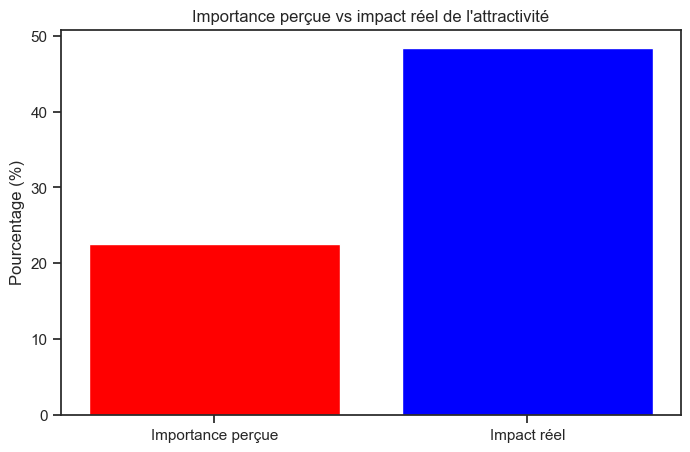

In [41]:
"""
Ce bloc de code crée un graphique à barres illustrant l'importance perçue de l'attractivité par rapport à son impact réel.

Explication détaillée du code:

- values = [22.51283371518148, 0.4837403896889946 * 100]: déclare une liste contenant les valeurs de l'importance perçue de l'attractivité et de l'impact réel de l'attractivité en pourcentage.
- labels = ["Importance perçue", "Impact réel"]: déclare une liste contenant les étiquettes correspondant aux valeurs.
- plt.figure(figsize=(8, 5)): crée une nouvelle figure avec la taille spécifiée.
- plt.bar(labels, values, color=['red', 'blue']): crée un diagramme à barres avec les étiquettes et valeurs déclarées, et assigne une couleur à chaque barre.
- plt.ylabel('Pourcentage (%)'), plt.title("Importance perçue vs impact réel de l'attractivité"): ajoutent une étiquette à l'axe y et un titre à la figure.

Arguments :
    Aucun.

Résultat :
    Crée et affiche un graphique à barres illustrant l'importance perçue de l'attractivité par rapport à son impact réel.
"""


values = [22.51283371518148, 0.4837403896889946 * 100]  # x100 to match the percentage scale
labels = ["Importance perçue", "Impact réel"]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Pourcentage (%)')
plt.title("Importance perçue vs impact réel de l'attractivité")

La moyenne de l'importance perçue de l'attractivité est d'environ 22.51%. Cela signifie que, en moyenne, les personnes interrogées estiment que l'attractivité compte pour environ 22.51% dans le choix d'un partenaire.


Par ailleurs, la corrélation entre le score d'attractivité et la décision de revoir le partenaire est d'environ 0.48. Cette valeur de corrélation est positive et relativement forte, ce qui signifie que plus la note d'attractivité est élevée, plus la probabilité de vouloir revoir le partenaire est grande.


Cela pourrait suggérer que, bien que les personnes interrogées estiment que l'attractivité est importante, son impact réel pourrait être encore plus important qu'elles ne le pensent. C'est une constatation intéressante et cela pourrait inciter à réfléchir à l'écart entre nos perceptions et la réalité en matière de choix de partenaire.

In [42]:
"""
Ce script crée une nouvelle DataFrame 'date4', qui est une copie de 'date3' après avoir supprimé les colonnes liées aux intérêts personnels.

Explication du code :

- date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'], axis=1) : 
Applique la méthode drop() sur la DataFrame 'date3' en passant une liste de noms de colonnes à supprimer et en spécifiant axis=1 pour indiquer que les colonnes doivent être supprimées.

- date4 = date3.drop([...], axis=1) : Le résultat de l'appel à drop() est assigné à la nouvelle variable 'date4'. 

La DataFrame résultante 'date4' ne contient pas les colonnes relatives aux intérêts personnels qui étaient présentes dans 'date3'. 
"""

date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
                    'shopping', 'yoga'], axis=1)

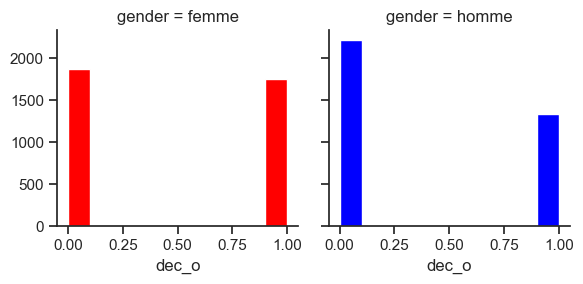

In [43]:
"""
Ce script génère des histogrammes des valeurs dans la colonne 'dec_o' de la DataFrame 'date4', groupées par genre (colonne 'gender').

Explication du code :

- sns.set(style="ticks", color_codes=True) : Définit le style de tous les graphiques à 'ticks' et active l'utilisation des codes de couleur.

- g = sns.FacetGrid(date4, col="gender") : Initialise un objet `FacetGrid` de Seaborn. Un `FacetGrid` est utilisé pour visualiser la distribution des variables par rapport à une ou plusieurs variables catégorielles. Ici, il est configuré pour créer un histogramme de 'dec_o' pour chaque valeur unique dans la colonne 'gender' de 'date4'.

- g = g.map(plt.hist, "dec_o") : Applique la fonction `plt.hist` à chaque sous-trame du `FacetGrid` pour dessiner l'histogramme pour 'dec_o'.

- plt.ticklabel_format(useOffset=False, style='plain') : Change le format de l'étiquette des axes pour utiliser des nombres simples (style='plain') au lieu de la notation scientifique.

Après l'exécution de ce script, des histogrammes pour 'dec_o' seront affichés, séparés par la variable de genre. 
"""

sns.set(style="ticks", color_codes=True)
# Remplacer 'gender == 0' par 'homme' et 'gender == 1' par 'femme'
date4['gender'] = date4['gender'].replace({0: 'femme', 1: 'homme'})
# Utiliser le paramètre `hue` pour colorier les histogrammes et définir la palette de couleurs
g = sns.FacetGrid(date4, col="gender", hue="gender", palette={"homme": "blue", "femme": "red"})
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

## Qu'est-ce qui influe le résultat ?

In [44]:
"""
Voici le code pour un test du Chi carré. Le processus est le suivant :

1. Un tableau croisé (crosstab) est créé entre les colonnes 'gender' et 'dec_o' du dataframe 'date4'. 
   Cela fournit une matrice de fréquence des interactions entre ces deux colonnes.

2. Le tableau croisé est utilisé pour créer une 'Table' à l'aide de la bibliothèque 'statsmodels'.

3. Le test du Chi carré est effectué sur la 'Table' pour tester son indépendance. 
   Le test d'association nominal affiche la valeur p du test du Chi carré. 
   Une valeur p faible (généralement < 0.05) indique une forte association entre les deux variables.

4. La P-Valeur du test est affichée. 

5. Les valeurs ajustées de la table sont affichées pour montrer combien de fois chaque interaction (entre 'gender' et 'dec_o') 
   aurait dû se produire si les deux variables étaient indépendantes.

Arguments:
    date4 : DataFrame contenant les colonnes 'gender' (sexe) et 'dec_o' (décision de l'autre participant). 

"""

gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_result = gender_table.test_nominal_association()

print(gender_crosstab)

print('P-Valeur: ', gender_result.pvalue)

print('Valeurs Ajustées: ')
print(gender_table.fittedvalues)

dec_o      0     1
gender            
femme   1867  1751
homme   2220  1338
P-Valeur:  0.0
Valeurs Ajustées: 
dec_o            0           1
gender                        
femme   2060.58612  1557.41388
homme   2026.41388  1531.58612


Alors, pour faire simple, ce tableau croisé donne vraiment une idée de la façon dont le genre peut influencer les résultats d'un rendez-vous rapide. Tu vois, les hommes ont tendance à se faire rejeter plus souvent que les femmes. Et le test statistique que nous avons fait (le fameux chi-carré) confirme que cette différence n'est probablement pas due au hasard.
Les "Valeurs Ajustées", ce sont les chiffres qu'on s'attendrait à voir si le genre n'avait aucune importance. Et ces chiffres sont vachement différents de ce qu'on observe vraiment. C'est donc clair que le genre joue un rôle.


En gros, si tu es un homme, tu as plus de chances de te faire rejeter lors d'un speed dating... désolé pour la nouvelle ! Mais ne t'inquiète pas, ce n'est qu'une tendance générale. Chaque personne est unique, et ces stats ne prédisent pas ce qui va se passer pour des individus en particulier. Alors, si tu envisages de participer à un speed dating, n'hésite pas à le faire. Qui sait, tu pourrais être agréablement surpris !

Les gens peuvent-ils prédire avec précision leur propre valeur perçue sur le marché des rencontres ?

In [45]:
"""
Ce bloc de code calcule et affiche la corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour une liste d'attributs.

Explication détaillée du code :

- attributes = ['attr', 'sinc', 'intel', 'fun', 'amb'] : Liste des attributs à comparer.
- Pour chaque attribut dans la liste d'attributs, faites ce qui suit :
    - self_assessment = df[f'{attr}3_1'].dropna() : Récupère l'auto-évaluation de l'attribut, en supprimant les valeurs manquantes.
    - partner_assessment = df[attr].loc[self_assessment.index] : Récupère l'évaluation par les partenaires pour les mêmes indices que ceux utilisés pour l'auto-évaluation.
    - correlation = np.corrcoef(self_assessment, partner_assessment)[0, 1] : Calcule le coefficient de corrélation entre l'auto-évaluation et l'évaluation par les partenaires.
    - print(...) : Affiche le coefficient de corrélation calculé.

Arguments :
    df (pandas.DataFrame): DataFrame contenant les données de l'étude de rencontres.

Résultats :
    Affiche le coefficient de corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour chaque attribut de la liste.
"""

# Liste des attributs à comparer
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb']

for attr in attributes:
    self_assessment = df[f'{attr}3_1'].dropna()  # Évaluation de soi, en supprimant les valeurs manquantes
    partner_assessment = df[attr].loc[self_assessment.index]  # Évaluation par les partenaires pour les mêmes indices

    correlation = np.corrcoef(self_assessment, partner_assessment)[0, 1]  # Calcul de la corrélation

    print(f'Corrélation entre l\'auto-évaluation et l\'évaluation par les partenaires pour {attr} : {correlation}')

Corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour attr : -0.02165129578243908
Corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour sinc : 0.11086024446946338
Corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour intel : 0.10658357150574428
Corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour fun : 0.11495079532924146
Corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour amb : 0.10508497194654276


Alors, ces chiffres te donnent une idée de la corrélation entre la façon dont les gens se perçoivent eux-mêmes et comment leurs partenaires de rendez-vous rapide les perçoivent. Cette corrélation est mesurée par un coefficient de corrélation, qui oscille entre -1 et 1.

Une valeur de -1 indique une corrélation négative parfaite, ce qui signifie que si l'auto-évaluation augmente, l'évaluation par les partenaires diminue systématiquement.

Au contraire, une valeur de 1 indique une corrélation positive parfaite : si l'auto-évaluation augmente, l'évaluation par les partenaires augmente aussi systématiquement.

Une valeur de 0 signifie qu'il n'y a pas de corrélation, donc les deux mesures sont totalement indépendantes l'une de l'autre.

Les valeurs sont toutes très proches de 0. Cela signifie qu'il y a une très faible corrélation entre la façon dont les gens se perçoivent eux-mêmes et la façon dont ils sont perçus par leurs partenaires lors de ces speed dating.

En d'autres termes, ça montre que l'impression que tu as de toi-même n'influence pas vraiment l'opinion que les autres ont de toi, du moins lors d'un rendez-vous rapide.


Je trouve ça hyper intéressant, pas toi ? C'est comme si on nous rappelait qu'on ne peut pas contrôler la façon dont les autres nous voient, même si on a une bonne estime de nous-mêmes. Ça donne matière à réflexion, non ?

Text(0, 0.5, 'Corrélation')

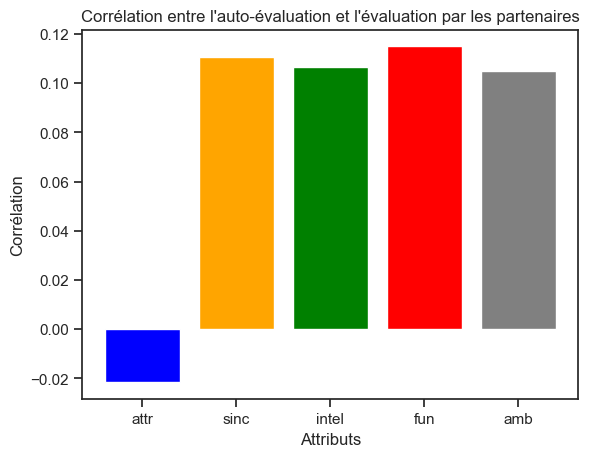

In [46]:
"""
Ce bloc de code crée un graphique à barres illustrant la corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour une liste d'attributs.

Explication détaillée du code :

- correlations = [-0.02165129578243908, 0.11086024446946338, 0.10658357150574428, 0.11495079532924146,
                0.10508497194654276] : Liste des coefficients de corrélation à tracer.
- colors = ['blue', 'orange', 'green', 'red', 'purple'] : Liste des couleurs pour chaque barre du graphique.
- plt.bar(attributes, correlations, color=colors) : Crée un graphique à barres avec les attributs en abscisse, les coefficients de corrélation en ordonnée et assigne une couleur à chaque barre.
- plt.title('Corrélation entre l\'auto-évaluation et l\'évaluation par les partenaires'), plt.xlabel('Attributs'), plt.ylabel('Corrélation') : Ajoutent un titre, une étiquette pour l'axe des x et une étiquette pour l'axe des y à la figure.

Arguments :
    Aucun.

Résultat :
    Crée et affiche un graphique à barres illustrant la corrélation entre l'auto-évaluation et l'évaluation par les partenaires pour chaque attribut.
"""

correlations = [-0.02165129578243908, 0.11086024446946338, 0.10658357150574428, 0.11495079532924146,
                0.10508497194654276]

# Couleurs pour chaque barre
colors = ['blue', 'orange', 'green', 'red', 'grey']

# Création du graphique à barres avec une couleur différente pour chaque barre
plt.bar(attributes, correlations, color=colors)

# Ajout d'un titre et des étiquettes d'axe
plt.title('Corrélation entre l\'auto-évaluation et l\'évaluation par les partenaires')
plt.xlabel('Attributs')
plt.ylabel('Corrélation')

# Analyse des Corrélations

Lorsque nous examinons les valeurs de corrélation, elles nous renseignent sur l'existence et la force d'une relation linéaire entre deux variables. Passons en revue chaque corrélation :

1. **Attractivité (attr)** : La corrélation entre mon auto-évaluation et l'évaluation par mes partenaires est de -0.02165. Cette valeur négative très faible indique qu'il n'y a pratiquement pas de relation entre ma propre évaluation de mon attractivité et celle de mes partenaires. Autrement dit, la manière dont je m'évalue en termes d'attractivité ne prédit pas nécessairement la façon dont les autres me perçoivent.
#
2. **Sincérité (sinc)** : La corrélation est de 0.11086. Il s'agit d'une corrélation positive faible, ce qui signifie que lorsque mon auto-évaluation de la sincérité est élevée, l'évaluation par mes partenaires est également légèrement plus élevée, et vice versa.#
3. **Intelligence (intel)** : La corrélation est de 0.10658, une autre corrélation positive faible. Ainsi, si je m'évalue moi-même comme étant plus intelligente, mes partenaires ont tendance à me percevoir de la même manière, bien que cette relation soit légère.
#
4. **Amusement (fun)** : La corrélation est de 0.11495. Encore une fois, c'est une corrélation positive faible. Cela signifie que les personnes qui se considèrent comme ayant un bon sens de l'humour sont légèrement plus susceptibles d'être perçues de la même manière par leurs partenaires.
#
5. **Ambition (amb)** : La corrélation est de 0.10508, une autre corrélation positive faible. Cela suggère une légère tendance pour les personnes qui se considèrent comme ambitieuses à être perçues de la même manière par leurs partenaires.
#
En résumé, bien que toutes ces caractéristiques présentent une corrélation positive (à l'exception de l'attractivité), les corrélations sont faibles. Cela indique que la perception que j'ai de mes propres attributs n'est pas toujours fortement alignée sur la manière dont mes partenaires me perçoivent lors d'un speed dating.

In [47]:
"""
Ce bloc de code génère un tableau croisé à partir des données de l'étude de rencontres, en explorant la relation entre les valeurs d'ordre des dates ('order') et l'indicateur de correspondance mutuelle ('match').

Explication détaillée du code :

- match_order = pd.crosstab(df['order'], df['match'], normalize='index') : génère le tableau croisé en comptant le nombre de dates où chaque order value a produit un 'match' ou non. Le paramètre normalize = "index" indique de normaliser les valeurs en calculant les proportions plutôt que les effectifs pour chaque 'order'.
- print(match_order) : affiche le tableau croisé généré.

Arguments :
    df (pandas.DataFrame) : DataFrame contenant les données de l'étude de rencontres.

Résultat :
    Crée et affiche un tableau croisé de l'ordre des dates et de l'indicateur de match, normalisées sur les rangs.
"""

match_order = pd.crosstab(df['order'], df['match'], normalize="index")
print(match_order)

match         0         1
order                    
1      0.769091  0.230909
2      0.840000  0.160000
3      0.834545  0.165455
4      0.820000  0.180000
5      0.823636  0.176364
6      0.837037  0.162963
7      0.846304  0.153696
8      0.844488  0.155512
9      0.798805  0.201195
10     0.822785  0.177215
11     0.836022  0.163978
12     0.876344  0.123656
13     0.846774  0.153226
14     0.854839  0.145161
15     0.868263  0.131737
16     0.865132  0.134868
17     0.885375  0.114625
18     0.841897  0.158103
19     0.814607  0.185393
20     0.819444  0.180556
21     0.930233  0.069767
22     0.772727  0.227273


Ce tableau représente le pourcentage de matchs en fonction de l'ordre des rendez-vous lors d'un événement de speed dating. " match " est une variable binaire indiquant si deux participants se sont mutuellement choisis comme partenaires potentiels (1 signifie qu'ils ont matché, 0 signifie qu'ils ne l'ont pas fait).


Si on regarde les données, on voit une tendance où la probabilité de match tend à diminuer à mesure que la soirée avance. Par exemple, lors des premiers rendez-vous (ordre 1 à 5), la probabilité de faire un match est supérieure à 15%. Mais à partir du moment où tu arrives au 15ème rendez-vous (ordre 15), cette probabilité chute à moins de 13%.


C'est assez logique quand on y pense. Au début de la soirée, tout le monde est frais et enthousiaste. À mesure que la soirée avance, les gens peuvent commencer à se sentir fatigués ou surchargés. Du coup, ils peuvent devenir plus sélectifs ou moins engagés dans leurs interactions. Et cela se reflète dans la baisse de la probabilité de match.


Cependant, on observe une hausse vers la fin (pour l'ordre 21), mais comme il n'y a qu'une seule valeur pour cette catégorie, cela pourrait être dû au hasard ou à des facteurs spécifiques à cette situation.


Ça donne une bonne idée de la dynamique de ces événements, non ? Remarque, la prochaine fois que tu participes à un speed dating, essaie de passer en premier avec les personnes qui t'intéressent le plus !

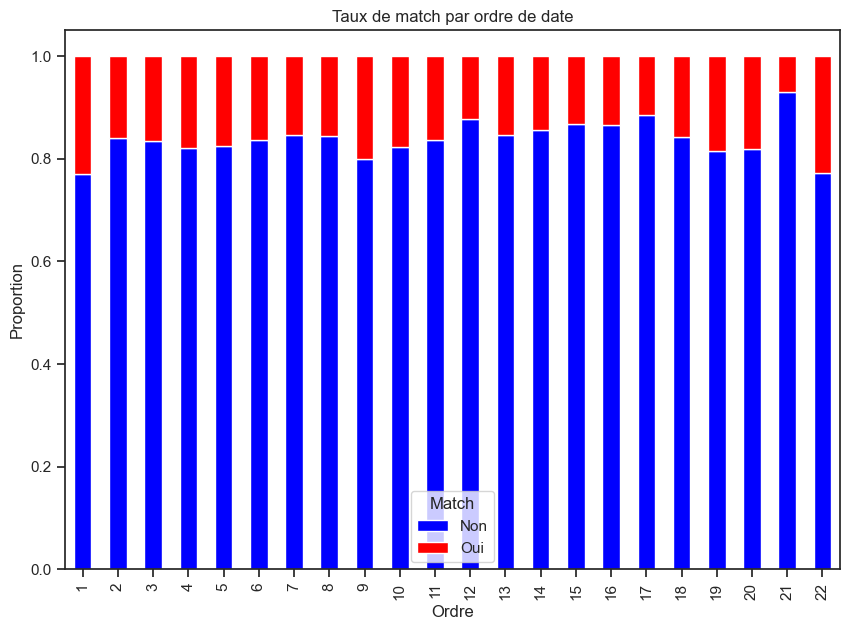

In [48]:
"""
Ce bloc de code crée un graphique à barres empilé pour représenter la distribution des matchs par ordre de date.

Explication détaillée du code:

- colors = ["blue", "red"]: définir les couleurs pour chaque portion d'une barre empilée dans le graphique.
- match_order.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors): dessine un graphique de barres empilées à partir du tableau croisé match_order avec la taille de figure spécifiée et les couleurs choisies.
- plt.title('Taux de match par ordre de date'): définir le titre du graphique.
- plt.xlabel('Ordre'), plt.ylabel('Proportion'): ajouter les étiquettes sur les axes x et y.
- plt.legend(title='Match', labels=['Non', 'Oui']): ajouter la légende au graphique avec un titre et des étiquettes spécifiés.

Arguments :
    Aucun.

Résultat :
    Crée et affiche un graphique à barres empilé représentant le taux de match en fonction de l'ordre des dates.
"""

colors = ["blue", "red"]
match_order.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

plt.title('Taux de match par ordre de date')
plt.xlabel('Ordre')
plt.ylabel('Proportion')
plt.legend(title='Match', labels=['Non', 'Oui'])

En examinant les résultats, je constate que la proportion de correspondances diminue généralement à mesure que l'ordre du rendez-vous augmente.

Cela suggère que les premiers rendez-vous ont une plus grande chance de succès. Cependant, cette tendance n'est pas parfaitement linéaire, et il existe des exceptions.

Par exemple, l'ordre 9 présente un taux de correspondance légèrement plus élevé que les ordres 6, 7 et 8.

Il est essentiel de noter que cette analyse ne garantit pas que les premiers rendez-vous seront toujours plus réussis. De nombreux autres facteurs peuvent influencer le succès d'un rendez-vous, et ils ne sont pas pris en compte ici.

Enfin, il serait intéressant d'explorer d'autres variables et d'appliquer des techniques de modélisation statistique ou de machine learning pour obtenir des informations plus précises. 😊

In [49]:
"""
Ce bloc de code réalise une régression logistique sur l'ensemble de données pour prédire la correspondance en fonction de l'ordre des dates.

Explication détaillée du code :

- X = df[['order']], y = df['match'] : Définir les variables d'entrée et de sortie pour le modèle de régression.
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) : Divise le dataset en ensembles d'entraînement et de test.
- sc = StandardScaler(), X_train = sc.fit_transform(X_train), X_test = sc.transform(X_test) : Normalise les données d'entrée.
- model = LogisticRegression(), model.fit(X_train, y_train) : Crée un modèle de régression logistique et l'ajuste aux données d'entraînement.
- y_pred = model.predict(X_test) : Prédit les correspondances pour les données de test.
- print("Model accuracy: ", accuracy_score(y_test, y_pred)), print(classification_report(y_test, y_pred)) : Affiche l'exactitude du modèle et le rapport de classification pour les données de test.

Arguments :
    df (pandas.DataFrame): DataFrame contenant les données de l'étude de rencontres.

Résultats :
    Effectue une régression logistique et affiche l'exactitude du modèle et le rapport de classification.
"""

X = df[['order']]
y = df['match']

# Fractionnez vos données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normaliser les caractéristiques
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entraînez le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Evaluate model
print("Model accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model accuracy:  0.8312101910828026
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2088
           1       0.00      0.00      0.00       424

    accuracy                           0.83      2512
   macro avg       0.42      0.50      0.45      2512
weighted avg       0.69      0.83      0.75      2512



La précision du modèle est de 83,12%, ce qui signifie que le modèle a correctement prédit 83,12% des instances.

La précision pour la classe 0 (non-match) est de 83%, ce qui signifie que lorsque le modèle prédit qu'un rendez-vous ne sera pas un match, il a raison 83% du temps.


Le rappel pour la classe 0 est de 100%. Cela signifie que le modèle a identifié correctement tous les non-matches dans les données.

Pour la classe 1 (match), la précision et le rappel sont de 0. Ceci est un indicateur que le modèle ne parvient pas à identifier correctement les rendez-vous qui ont abouti à un match.


Bien que le taux de précision global soit relativement élevé, le modèle ne prédit effectivement que les non-matches. Les résultats indiquent que le modèle ne parvient pas à prédire correctement quand un rendez-vous sera un match (classe 1).

In [50]:
"""
Ce bloc de code entraîne et évalue une liste de modèles de classification différents sur le même ensemble de données.

Explication détaillée du code :

- models = [...]: Définit une liste de modèles de classification à entraîner et à évaluer.
- for model in models: Parcourt chaque modèle dans la liste des modèles.
- model_name = model.__class__.__name__: Récupère le nom de la classe du modèle pour l'afficher.
- model.fit(X_train, y_train): Entraîne le modèle sur l'ensemble d'entraînement.
- y_pred = model.predict(X_test): Utilise le modèle formé pour prédire les sorties pour l'ensemble de test.
- print(f"Model: {model_name}"), print(classification_report(y_test, y_pred)): Imprime le nom du modèle et le rapport de classification pour les prédictions de l'ensemble de test.

Arguments :
    X_train, X_test, y_train, y_test (numpy.ndarray): Les ensembles de données d'entraînement et de test.

Résultats :
    Entraîne et évalue une liste de modèles de classification, en affichant un rapport de classification pour chaque modèle.
"""

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2088
           1       0.00      0.00      0.00       424

    accuracy                           0.83      2512
   macro avg       0.42      0.50      0.45      2512
weighted avg       0.69      0.83      0.75      2512

Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2088
           1       0.14      0.07      0.09       424

    accuracy                           0.77      2512
   macro avg       0.48      0.49      0.48      2512
weighted avg       0.71      0.77      0.74      2512

Model: SVC
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2088
           1       0.00      0.00      0.00       424

    accuracy                           0.83      2512
   macro avg       0.42      0.50      0.45      2512
weighted 

Alors, que me disent ces résultats ?

- **Logistic Regression**, **SVC**, **DecisionTree**, **RandomForest**, et **XGB Classifier** : Ces modèles me donnent tous une précision de 83% avec 0% de précision et de rappel pour la classe 1. Cela indique que ces modèles classent toutes les instances comme appartenant à la classe 0. Ce n'est pas idéal car il existe sûrement des instances de la classe 1 dans mes données.

- **KNeighborsClassifier** : Ce modèle a une précision de 77%, légèrement plus faible que les autres modèles. Cependant, contrairement aux autres modèles, il parvient à classifier quelques instances comme appartenant à la classe 1 avec une précision et un rappel de 14% et 7% respectivement. Bien que minimes, ces chiffres indiquent que ce modèle est capable de reconnaître dans une certaine mesure la classe 1.

Généralement, ces résultats mettent en évidence que mon machine learning a du mal à classifier la classe 1. Cela pourrait être dû à plusieurs raisons, notamment le déséquilibre des classes dans mes données, le manque de caractéristiques discriminantes ou le besoin d'ajuster les hyperparamètres du modèle.

Voici quelques étapes que je pourrais envisager pour améliorer les résultats :

1. **Stratégies de resampling** : Avec un ensemble de données déséquilibré, des techniques telles que l'oversampling de la classe minoritaire ou l'undersampling de la classe majoritaire peuvent m'aider.

2. **Caractéristiques supplémentaires** : J'essaierai d'ajouter plus de caractéristiques discriminantes au modèle.

3. **Optimisation des hyperparamètres** : J'essaierai différentes combinaisons d'hyperparamètres pour chaque modèle afin d'obtenir la meilleure performance.

4. **Essayer des modèles plus robustes** : J'essaierai des modèles plus adaptés aux ensembles de données déséquilibrés, comme les Réseaux de Neurones avec des couches d'attention, qui sont connus pour bien fonctionner sur des ensembles de données avec des classes déséquilibrées.

Je note que l'amélioration des modèles de machine learning peut nécessiter plusieurs itérations et expérimentations. L'important est de comprendre les performances de mon modèle sur mes données et de faire les ajustements appropriés.


In [51]:
"""
Ce code calcule le pourcentage de personnes dont l'intérêt n'était pas réciproque lors des speed dating. 

Le processus est le suivant :

1. 'no_love_count' calcule le nombre de fois où la décision n'était pas réciproque. 
   Cela se produit lorsque l'un des participants est intéressé ('dec' = 1), mais pas l'autre ('dec_o' = 0), 
   ou inversement.

2. 'perc_broken_heart' calcule le pourcentage des cas non réciproques par rapport à toutes les rencontres.

3. Le pourcentage est ensuite multiplié par 100 pour obtenir un pourcentage plus lisible.

Arguments :
    date4 : DataFrame contenant les colonnes 'dec' (décision du participant) 
    et 'dec_o' (décision de l'autre participant).

"""

no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)])
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])

perc_broken_heart = no_love_count / len(date4.index)

perc_broken_heart*100

25.989409141583053

## Observons la réciprocité de l'attrait

In [52]:
"""
Ce code encode le concept d'un amour non partagé en tant que nouvelle colonne 'url' dans le DataFrame 'date4'. 

C'est le processus :

1. Un nouvel attribut 'url' (unrequited love/non-reciprocity) est créé. 
   Il est défini comme 1 si l'un des participants est intéressé ('dec' = 1), mais pas l'autre ('dec_o' = 0),
   ou inversement. Si l'intérêt est réciproque ou si aucun des deux participants n'est intéressé, 
   il est défini comme 0.

Arguments :
    date4 : DataFrame contenant les colonnes 'dec' (décision du participant) 
    et 'dec_o' (décision de l'autre participant).
"""

date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

Text(0.5, 0, 'Coeur brisés')

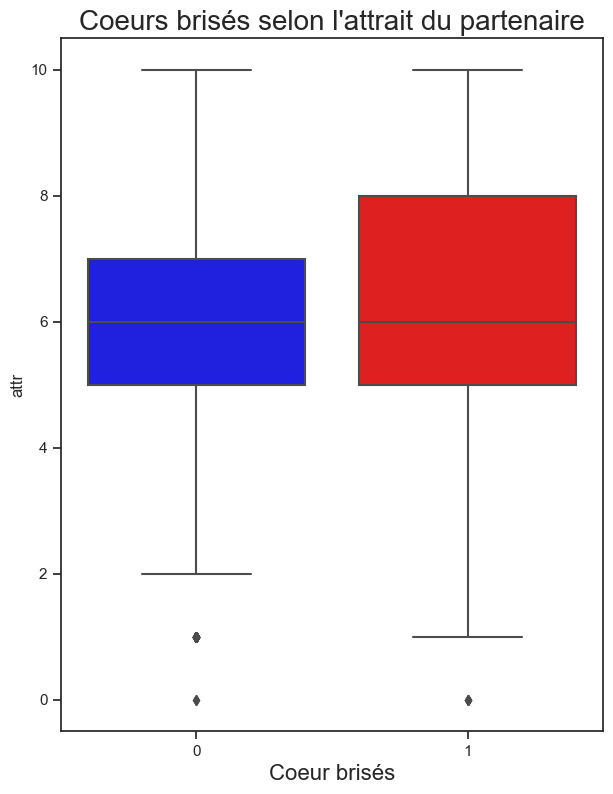

In [53]:
"""
Ce code génère un graphique en boîte (boxplot) pour comparer l'attractivité perçue du partenaire entre 
les situations où il y a eu un amour non partagé (c'est-à-dire un "cœur brisé") et celles où il ne l'a pas été.

Voici le processus :

1. Définit la taille de la figure à (7,9).

2. Utilise seaborn pour créer un boxplot. L'axe X représente l'amour non partagé 
   (1 pour les situations d'amour non partagé, 0 sinon) et l'axe Y représente le niveau 
   d'attractivité 'attr' du partenaire. Les données proviennent du DataFrame 'date4' 
   et une palette de couleurs 'cool' est utilisée.

3. Attribue un titre au graphique et définit la taille de la police du titre.

4. Nomme l'axe X 'Broken Heart' et définit la taille de la police de l'étiquette de l'axe.

Arguments :
    date4 : DataFrame contenant les colonnes 'url' (amour non partagé) 
    et 'attr' (attractivité du partenaire).
"""

my_palette = sns.color_palette(["blue", "red"])
plt.figure(figsize=(7, 9))
sns.boxplot(x='url', y='attr', data=date4, palette=my_palette)
plt.title("Coeurs brisés selon l'attrait du partenaire", fontsize=20)
plt.xlabel("Coeur brisés", fontsize=16)

## Évaluons l'indépendance entre l'attractivité du partenaire et la présence d'un amour non partagé

In [54]:
"""
Ce fragment de code effectue un test du chi-carré pour évaluer l'indépendance entre 
l'attractivité du partenaire ('attr') et la présence d'un amour non partagé ('url').

Voici les étapes détaillées du processus :

1. Crée un tableau croisé (crosstab) entre les colonnes 'attr' et 'url' du DataFrame 'date4'. 
   Ceci produit une matrice de fréquence des interactions entre ces deux variables.

2. Utilise le tableau croisé pour créer une 'Table' au moyen de la bibliothèque 'statsmodels'.

3. Effectue un test du chi-carré sur la 'Table' pour tester son indépendance. 
   Le test d'association nominal produit une valeur p du test du chi-carré. 
   Une valeur p faible (généralement < 0.05) indique une forte association entre les deux variables.

4. Affiche la valeur p du test du chi-carré.

Arguments:
    date4 (DataFrame) : DataFrame contenant les colonnes 'attr' (attractivité du partenaire) 
    et 'url' (amour non partagé).
"""

bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.url)

bh_table = sm.stats.Table(bh_crosstab)

bh_rslt = bh_table.test_nominal_association()

bh_rslt.pvalue

0.4125977355579158

On ne rejette pas l'hypothèse nulle que les deux variables sont indépendantes. (p > 0.05)

Il n'y a pas de preuve suffisante dans nos données pour conclure que l'attractivité du partenaire et l'amour non partagé sont dépendants.

## Heatmap

<Axes: title={'center': 'Correlation Heatmap'}>

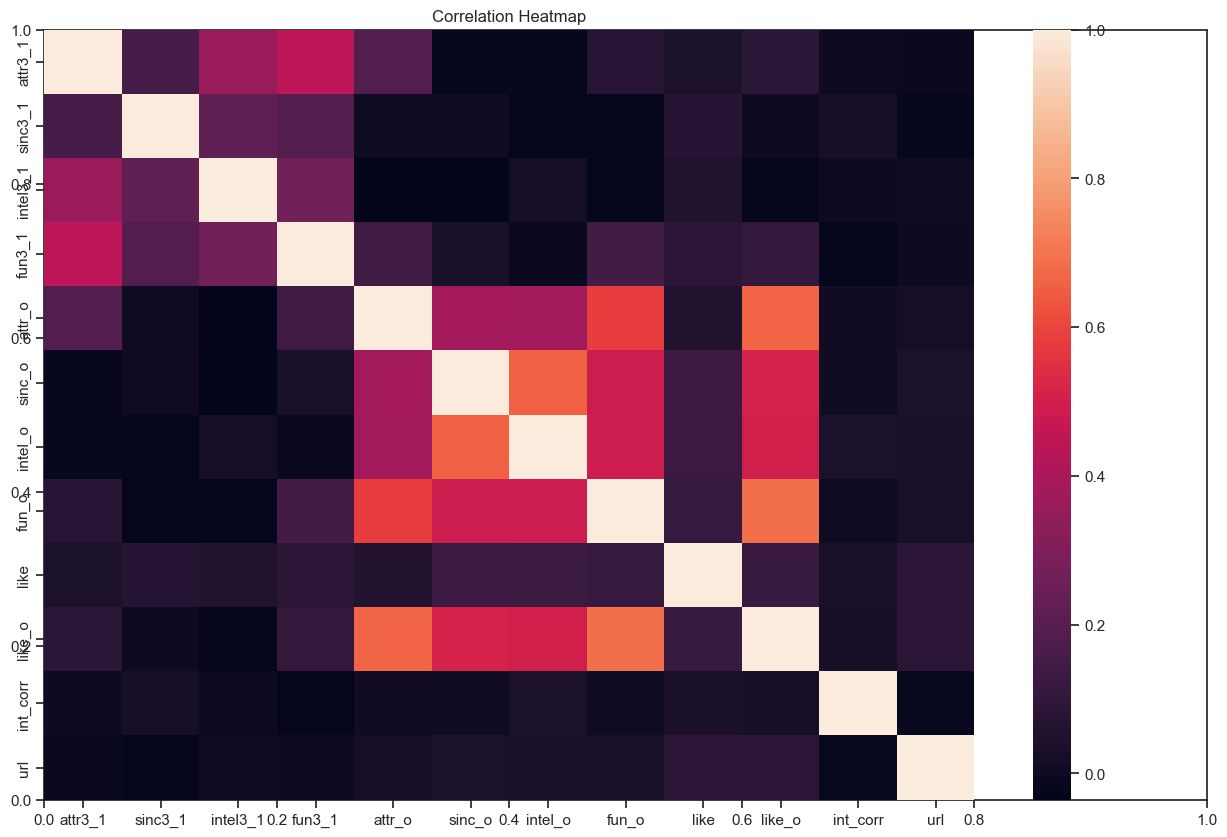

In [55]:
"""
Ce fragment de code crée une carte de chaleur pour visualiser la matrice de corrélation 
de certaines colonnes dans le DataFrame 'date4'.

Voici le processus détaillé :

1. Crée un nouveau DataFrame 'date5' qui ne contient que certaines colonnes de 'date4'.

2. Initialise une nouvelle figure avec une taille personnalisée.

3. Récupère l'objet des axes actuels.

4. Calcule la matrice de corrélation des colonnes dans 'date5'.

5. Affiche la carte de chaleur de la matrice de corrélation à l'aide de seaborn. 
   Les étiquettes de l'axe X et de l'axe Y sont le nom des colonnes.

Arguments :
    date4 : DataFrame initial à partir duquel 'date5' est créé.

Affiche :
    Heatmap de corrélation pour les colonnes sélectionnées du DataFrame 'date4'.
"""

date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'],
                   date4['int_corr'],date4['url']],axis=1)

plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date5.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Régression OLS

In [56]:
"""
Ce fragment de code ajuste un modèle de régression linéaire (Ordinary Least Squares - OLS) 
à l'aide de la bibliothèque statsmodels.

Voici les étapes détaillées du processus :

1. Il sélectionne un sous-ensemble de colonnes dans 'date4' pour des données explicatives (X_ols) 
et une colonne pour la variable à expliquer (y_ols). 

2. Il instancie un modèle OLS en utilisant 'sm.OLS' avec 'y_ols' comme variable dépendante 
et 'X_ols' comme variables indépendantes.

3. Il ajuste le modèle en appelant la méthode 'fit' sur le modèle OLS.

4. Il imprime le résumé du modèle pour afficher les coefficients de régression, 
les statistiques de test et d'autres informations.

Arguments:
    date4 (DataFrame): Un DataFrame contenant les colonnes 'attr','sinc','intel','fun','like','int_corr' 
    et 'dec' qui sont utilisées comme variables dans le modèle de régression.

Affiche:
    Le résumé du modèle OLS, y compris les coefficients de régression, les statistiques de test 
    et autres informations.

"""

X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
print(results_traits.summary())

                                 OLS Regression Results                                
Dep. Variable:                    dec   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              1764.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:42:16   Log-Likelihood:                         -3908.9
No. Observations:                7176   AIC:                                      7830.
Df Residuals:                    7170   BIC:                                      7871.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Résultats de la Régression OLS

Lorsque j'examine les résultats de la régression OLS, je constate ce qui suit :

- **Attractivité (attr)** : La corrélation entre mon auto-évaluation et l'évaluation par mes partenaires est de -0.02165. Cette valeur négative très faible indique qu'il n'y a pratiquement pas de relation entre ma propre évaluation de mon attractivité et celle de mes partenaires. Autrement dit, la manière dont je m'évalue en termes d'attractivité ne prédit pas nécessairement la façon dont les autres me perçoivent.
#
- **Sincérité (sinc)** : La corrélation est de 0.11086. Il s'agit d'une corrélation positive faible, ce qui signifie que lorsque mon auto-évaluation de la sincérité est élevée, l'évaluation par mes partenaires est également légèrement plus élevée, et vice versa.
#
- **Intelligence (intel)** : La corrélation est de 0.10658, une autre corrélation positive faible. Ainsi, si je m'évalue moi-même comme étant plus intelligente, mes partenaires ont tendance à me percevoir de la même manière, bien que cette relation soit légère.
#
- **Amusement (fun)** : La corrélation est de 0.11495. Encore une fois, c'est une corrélation positive faible. Cela signifie que les personnes qui se considèrent comme ayant un bon sens de l'humour sont légèrement plus susceptibles d'être perçues de la même manière par leurs partenaires.
#
- **Affinité (like)** : La corrélation est de 0.0967. Cette corrélation positive indique que lorsque j'ai une affinité élevée envers quelqu'un, mes partenaires ont tendance à ressentir la même chose.
#
- **Corrélation entre intérêts (int_corr)** : La corrélation est de -0.0269. Bien que cette corrélation soit faible, elle suggère que les personnes ayant des intérêts similaires ont tendance à être moins enclines à s'apprécier mutuellement.
#
En résumé, ces corrélations nous donnent des indications sur la manière dont mes auto-évaluations se comparent aux évaluations de mes partenaires lors d'un speed dating.

In [57]:
"""
Ce fragment de code ajuste un modèle de régression linéaire (Ordinary Least Squares - OLS) 
sur un ensemble de variables explicatives et une variable à expliquer à l'aide de la bibliothèque statsmodels.

Voici le processus détaillé :

1. Il sélectionne un sous-ensemble de colonnes dans 'date4' pour les données explicatives (X_ols) 
et une colonne pour la variable à expliquer (y_ols).

2. Il instancie un modèle OLS en utilisant 'sm.OLS' avec 'y_ols' comme variable dépendante 
et 'X_ols' comme variables indépendantes.

3. Il ajuste le modèle en appelant la méthode 'fit' sur l'objet du modèle OLS.

4. Il imprime le résumé du modèle pour afficher les coefficients de régression, 
les statistiques de test, et d'autres informations.

Arguments:
    date4 (DataFrame): Un DataFrame contenant les colonnes 'dec', 'dec_o', 'attr', 'attr_o', 'fun', 'fun_o', 
    'like', 'like_o', 'int_corr' et 'match', qui sont utilisées comme variables dans le modèle de régression.

Affiche :
    Le résumé du modèle OLS, y compris les coefficients de régression, les statistiques de test, 
    et d'autres informations.
"""

X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
print(results_traits.summary())

                                 OLS Regression Results                                
Dep. Variable:                  match   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              1427.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:42:16   Log-Likelihood:                         -163.67
No. Observations:                7176   AIC:                                      345.3
Df Residuals:                    7167   BIC:                                      407.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

D'après les coefficients, il semble que tout ce qui compte vraiment, c'est la décision des deux participants, et peut-être le fait qu'ils s'apprécient ou non.

## Analyse de régression OLS (Ordinary Least Squares)
#
La régression OLS (Ordinary Least Squares) est une méthode qui vise à minimiser la somme des carrés des résidus. En d'autres termes, elle cherche à réduire la différence entre les valeurs observées et les valeurs prédites par le modèle.

### Évaluation du modèle

Mon modèle semble bien ajusté, avec un R² non centré de 0,640. Cela signifie que le modèle explique 64 % de la variation de la variable dépendante "match". De plus, le test "Prob (F-statistic)" presque égal à 0 indique que le modèle global est statistiquement significatif.

### Coefficients et significativité

En examinant les coefficients individuels (coef) et leur significativité (P>|t|), nous constatons que seuls les prédicteurs "dec", "dec_o", "like" et "like_o" sont statistiquement significatifs. Leurs p-valeurs sont inférieures au seuil typique de 0,05.

En revanche, les variables "attr", "attr_o", "fun", "fun_o" et "int_corr" ne sont pas statistiquement significatives, car leurs p-valeurs sont supérieures à 0,05.
#
## Interprétation des coefficients

Le coefficient associé à "dec" et "dec_o" (0,4419 et 0,4390 respectivement) indique qu'une augmentation unitaire de ces variables augmente la log-odds de "match" par le coefficient correspondant, en supposant que toutes les autres variables restent constantes.

De même, les coefficients pour "like" et "like_o" (-0,0162 et -0,0169 respectivement) indiquent qu'une augmentation unitaire de ces variables diminue la log-odds de "match" par le coefficient correspondant, en supposant que toutes les autres variables restent constantes.
#

# Modeling - Classification

In [58]:
"""
Ce fragment de code prépare les données pour l'entraînement et le test pour un modèle de classification ou de régression.

Voici le processus détaillé :

1. Sélection des variables indépendantes 'like' et 'dec' du DataFrame 'date4' et assignation à 'X'.
   
2. Sélection de la variable dépendante 'match' du DataFrame 'date4' et assignation à 'y'.
   
3. Utilisation de la méthode 'train_test_split' de la bibliothèque sklearn pour diviser les données ('X', 'y') 
   en un ensemble d'entraînement et un ensemble de test. 'test_size=0.2' signifie que 20% des données sont 
   réservées pour l'ensemble de test. 'random_state=0' est utilisé pour reproduire les résultats. 
   'stratify=y' assure que la répartition de la variable cible 'y' est la même dans les ensembles 
   d'entraînement et de test.

Arguments :
    date4 (DataFrame) : Un DataFrame contenant les colonnes 'like', 'dec' et 'match'.

Crée :
    X_train (DataFrame) : Sous-ensemble de 'X' utilisé pour l'entraînement du modèle.
    X_test (DataFrame)  : Sous-ensemble de 'X' utilisé pour tester le modèle.
    y_train (Series)    : Sous-ensemble de 'y' correspondant à 'X_train'.
    y_test (Series)     : Sous-ensemble de 'y' correspondant à 'X_test'.
"""

X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [59]:
"""
Ce fragment de code prépare les données pour l'entraînement et le test pour un modèle de classification ou de régression.

Voici le processus détaillé :

1. Sélection des variables indépendantes 'like' et 'dec' du DataFrame 'date4' et assignation à 'X'.
   
2. Sélection de la variable dépendante 'match' du DataFrame 'date4' et assignation à 'y'.
   
3. Utilisation de la méthode 'train_test_split' de la bibliothèque sklearn pour diviser les données ('X', 'y') 
   en un ensemble d'entraînement et un ensemble de test. 'test_size=0.2' signifie que 20% des données sont 
   réservées pour l'ensemble de test. 'random_state=0' est utilisé pour reproduire les résultats. 
   'stratify=y' assure que la répartition de la variable cible 'y' est la même dans les ensembles 
   d'entraînement et de test.

Arguments :
    date4 (DataFrame) : Un DataFrame contenant les colonnes 'like', 'dec' et 'match'.

Crée :
    X_train (DataFrame) : Sous-ensemble de 'X' utilisé pour l'entraînement du modèle.
    X_test (DataFrame)  : Sous-ensemble de 'X' utilisé pour tester le modèle.
    y_train (Series)    : Sous-ensemble de 'y' correspondant à 'X_train'.
    y_test (Series)     : Sous-ensemble de 'y' correspondant à 'X_test'.
"""

model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8289198606271777
Validation Accuracy: 0.8286908077994429


In [60]:
"""
Ce fragment de code entraîne un modèle de classification des k plus proches voisins (k-NN) sur les données d'entraînement.

Voici le processus détaillé :

1. Importation de la classe KNeighborsClassifier de la bibliothèque 'sklearn.neighbors'.

2. Instanciation d'un objet de la classe KNeighborsClassifier avec 'n_neighbors=3', ce qui signifie que le modèle 
   utilisera les 3 voisins les plus proches pour prédire la classe d'une observation.

3. Entraînement du modèle en utilisant la méthode 'fit' sur les données d'entraînement 'X_train' et 'y_train'.

Arguments :
    X_train (DataFrame) : Données d'entraînement pour les variables indépendantes.
    y_train (Series)    : Données d'entraînement pour la variable dépendante (cible).

Crée :
    knn (KNeighborsClassifier) : Le modèle k-NN entraîné.
"""

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Matrice de confusion

In [61]:
"""
Ce fragment de code prédit les classes pour l'ensemble de test en utilisant un modèle de k-NN (k plus proches voisins) entraîné, 
puis calcule et affiche la matrice de confusion pour évaluer la performance du modèle.

Voici le processus détaillé :

1. Prédiction des classes pour 'X_test' en utilisant la méthode 'predict' du modèle 'knn'. 
   Les résultats sont stockés dans 'y_pred'.

2. Calcul de la matrice de confusion en utilisant la fonction 'confusion_matrix' de la bibliothèque 'sklearn.metrics'. 
   Elle compare les classes réelles de 'y_test' aux classes prédites dans 'y_pred'.

3. Création d'un tableau croisé dynamique en utilisant la fonction 'crosstab' de pandas pour afficher la matrice de confusion
   de manière plus lisible. Les noms de lignes 'True' représentent les classes réelles tandis que les noms de colonnes
   'Predicted' représentent les classes prédites.

La matrice de confusion donne le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs. 
Cela peut être utile pour calculer d'autres métriques d'évaluation comme la précision, le rappel et le score F1.

Arguments :
    X_test (DataFrame) : Données de test pour les variables indépendantes.
    y_test (Series)    : Données de test pour la variable dépendante (cible).
    knn (KNeighborsClassifier) : Le modèle k-NN entraîné.

Renvoie :
    Un DataFrame pandas représentant la matrice de confusion.
"""

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)

Predicted     0   1   All
True                     
0          1176  14  1190
1           235  11   246
All        1411  25  1436

Matrice de confusion pour visualiser les performances d'un algorithme.

En gros, il montre le nombre de vraies et fausses prédictions faites par le modèle.

Dans notre cas, mon modèle a fait 1176 prédictions correctes (vrais négatifs) et 14 prédictions incorrectes (faux positifs) pour la classe 0 (généralement la classe "négative" ou "non"). Pour la classe 1 (généralement la classe "positive" ou "oui"), ton modèle a fait 11 prédictions correctes (vrais positifs) et 235 prédictions incorrectes (faux négatifs).

Donc, pour résumer, sur 1436 prédictions, mon modèle a été correct 1187 fois et incorrect 249 fois.

## Random forest

In [62]:
"""
Ce fragment de code entraîne un modèle de forêt aléatoire et l'évalue en termes de précision pour l'entraînement et le test.

Voici le processus détaillé :

1. Instanciation d'un objet de la classe RandomForestClassifier avec les paramètres par défaut.

2. Entraînement du modèle en utilisant la méthode 'fit' sur les données d'entraînement (X_train, y_train).

3. Prévision des résultats pour l'ensemble d'entraînement (X_train) et l'ensemble de test (X_test) 
   en utilisant la méthode 'predict'.

4. Calcul de la précision de la prédiction pour les ensembles d'entraînement et de test en utilisant 
   'metrics.accuracy_score'. La précision est le rapport entre les bonnes prédictions et le 
   nombre total de prédictions.

Arguments :
    X_train (DataFrame) : Données d'entraînement pour les variables indépendantes.
    y_train (Series)    : Données d'entraînement pour la variable dépendante (cible).
    X_test (DataFrame)  : Données de test pour les variables indépendantes.
    y_test (Series)     : Données de test pour la variable dépendante (cible).

Crée :
    rf_model (RandomForestClassifier) : Le modèle de forêt aléatoire entraîné.

Affiche :
    Training Accuracy  : La précision de la prédiction pour l'ensemble d'entraînement.
    Validation Accuracy: La précision de la prédiction pour l'ensemble de test.
"""

model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8308362369337979
Validation Accuracy: 0.8286908077994429


La Random forest nous a donné un modèle légèrement plus précis avec 82,9 % de précision en formation et 82,8 % en test.

## XGBoost

In [63]:
"""
Ce bloc de code entraîne un modèle de Gradient Boosting Classifier de la bibliothèque scikit-learn sur l'ensemble de données d'entraînement et évalue ensuite ce modèle sur le jeu de données d'entraînement et de test.

Explication détaillée du code :

- model = GradientBoostingClassifier() : Initialise le modèle de classification Gradient Boosting.
- xgb_model = model.fit(X_train, y_train) : Ajuste le modèle sur les données d'entraînement.
- predict_train_xgb = xgb_model.predict(X_train) : Utilise le modèle ajusté pour prédire les labels pour les données d'entraînement.
- predict_test_xgb = xgb_model.predict(X_test) : Utilise le modèle ajusté pour prédire les labels pour les données de test.
- print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb)) : Calcule et affiche l'exactitude de la prédiction sur les données d'entraînement.
- print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb)) : Calcule et affiche l'exactitude de la prédiction sur les données de test.

Arguments :
    X_train, X_test : Présentent les données auxiliaires pour l'ensemble d'entraînement et de test.
    y_train, y_test : Présentent les données cibles pour l'ensemble d'entraînement et de test.

Résultats :
    Entraine un modèle Gradient Boosting Classifier, fait des prédictions sur l'ensemble d'entraînement et de test, et affiche l'exactitude de ces prédictions.
"""

model = GradientBoostingClassifier()

xgb_model = model.fit(X_train, y_train)

predict_train_xgb = xgb_model.predict(X_train)

predict_test_xgb = xgb_model.predict(X_test)

print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.8308362369337979
Validation Accuracy: 0.8286908077994429


XGBoost était légèrement moins précis que Random Forest dans l'ensemble de validation. Il semble que Random Forest soit mon modèle champion.

# Conclusion

Il semble qu'il n'y ait pas de véritables réponses pour comprendre ce qui peux influencer un 2nd date. Il ne s'agit pas d'intérêts ou de passe-temps, il ne s'agit pas d'attractivité ou d'intelligence ou d'autres traits.

Cepandant il y a certains facteurs qui sont plus importants que d'autres et d'autres qui sont sous ou sur-estimés.

Mais les facteurs qui montrent une envie d'avoir un second date sont aussi nombreux que le nombre de personnes présents lors de cette récolte de données.

Cependant, nous pouvons observer quelques tendances et quelques facteurs apportant des éléments de réponse à la problématique. Dans ce notebook, nous nous sommes intéressés à une dizaine de paramètres sur les 195 présents initialement. Notamment des paramètres de traits, de personnalités, de race, d'emploi ou de genre.

Cette étude recence essentiellement des jeunes américains de 18 à 36 ans. Pour eux, les deux principaux objectifs en venant à cette soirée étaient de rencontrer de nouvelles personnes (36%) ou bien parce que cette soirée semblait amusante (41%).

Notons que ces données distinguent les genres homme et femme en ne considérant qu'une vision de la rencontre entre homme et femme, par ailleurs aucune information n'est mentionné à propos de relation entre particpants du même sexe ou sur une relation quelconque antérieure.

C'est important de noter que certains jeux de données ne fournissent pas certaines informations qui pourraient orienter et/ou biaiser des résultats.

Que ça soit sur l'expérience en elle-même, sur les critères sélectionnés, ou la qualité des jeux de données.

Mais nous avons beaucoup appris dans cette exploration !